# Исследовательский анализ данных для сервиса Яндекс Афиша
- Автор: Шамсуллин Радмир Ильшатович
- Дата: 09.01.2026

### Цели и задачи проекта

По заказу сервиса **Яндекс Афиша** необходимо провести исследовательский анализ пользовательского спроса.

**Цель:** Провести исследовательский анализ данных сервиса бронирования билетов Яндекс Афиша за период с 1 июня по 31 октября 2024 года и выяснить причины изменения в пользовательском спросе.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым;
3. Провести исследовательский анализ данных;
4. Провести статистический анализ данных:
5. Сформулировать выводы по проведённому анализу.

### Описание данных

Датасет `final_tickets_orders_df.csv` включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных:
- `order_id` — уникальный идентификатор заказа.
- `user_id` — уникальный идентификатор пользователя.
- `created_dt_msk` — дата создания заказа (московское время).
- `created_ts_msk` — дата и время создания заказа (московское время).
- `event_id` — идентификатор мероприятия из таблицы events.
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- `age_limit` — возрастное ограничение мероприятия.
- `currency_code` — валюта оплаты, например rub для российских рублей.
- `device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
- `revenue` — выручка от заказа.
- `service_name` — название билетного оператора.
- `tickets_count` — количество купленных билетов.
- `total` — общая сумма заказа.
- `days_since_prev` — столбец с количеством дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

Датасет `final_tickets_events_df.csv` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия:
- `event_id` — уникальный идентификатор мероприятия.
- `event_name` — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- `event_type_description` — описание типа мероприятия.
- `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.
- `organizers` — организаторы мероприятия.
- `region_name` — название региона.
- `city_name` — название города.
- `venue_id` — уникальный идентификатор площадки.
- `venue_name` — название площадки.
- `venue_address` — адрес площадки.

Датасет `final_tickets_tenge_df.csv` содержит информацию о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге:
- `nominal` — номинал (100 тенге);
- `data` — дата;
- `curs` — курс тенге к рублю;
- `cdx` — обозначение валюты (kzt).

### Содержимое проекта

- [1. Загрузка данных и знакомство с ними](#Загрузка-данных-и-знакомство-с-ними)
    - [1.1 Промежуточный вывод](#Промежуточный-вывод)
- [2. Предобработка данных и подготовка их к исследованию](#Предобработка-данных-и-подготовка-их-к-исследованию)
    - [2.1 Работа с пропусками](#Работа-с-пропусками)
    - [2.2 Работа с дубликатами](#Работа-с-дубликатами)
    - [2.3 Категориальные данные](#Категориальные-данные)
    - [2.4 Количественные данные](#Количественные-данные)
    - [2.5 Преобразование типов данных](#Преобразование-типов-данных)
    - [2.6 Создание новых столбцов](#Создание-новых-столбцов)
- [3. Исследовательский анализ данных](#Исследовательский-анализ-данных)
    - [3.1 Анализ распределения заказов по сегментам и их сезонные изменения](#Анализ-распределения-заказов-по-сегментам-и-их-сезонные-изменения)
    - [3.2 Осенняя активность пользователей](#Осенняя-активность-пользователей)
    - [3.3 Популярные события и партнёры](#Популярные-события-и-партнёры)
- [4. Статистический анализ данных](#Статистический-анализ-данных)
    - [4.1 Гипотеза 1](#Гипотеза-1)
    - [4.2 Гипотеза 2](#Гипотеза-2)
- [5. Общий вывод и рекомендации](#Общий-вывод-и-рекомендации)
    - [5.1 Выводы](#Выводы)
    - [5.2 Рекомендации](#Рекомендации)

<a id="#start"></a>
## Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `final_tickets_orders_df.csv`, `final_tickets_events_df.csv` и `final_tickets_tenge_df.csv`. Данные датасетов сохраним в трех переменных: `df_orders`, `df_events` и `df_tenge`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import mannwhitneyu
from scipy import stats

In [2]:
df_orders = pd.read_csv('...')
df_events = pd.read_csv('...')
df_tenge = pd.read_csv('...')

Посмотрим информацию о загруженных датафреймах:

Познакомимся с данными датасета `final_tickets_orders_df.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
df_orders.info()
display(df_orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


Датасет `final_tickets_orders_df.csv` содержит 14 столбцов и 290849 строк.

Познакомимся с данными датасета `final_tickets_events_df.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [4]:
df_events.info()
display(df_events.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


Датасет `final_tickets_events_df.csv` содержит 11 столбцов и 22427 строк.

Познакомимся с данными датасета `final_tickets_tenge_df.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [5]:
df_tenge.info()
display(df_tenge.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


Датасет `final_tickets_tenge_df.csv` содержит 4 столбца и 357 строк.

### Промежуточный вывод

После первичного анализа датасета `final_tickets_orders_df.csv` можно сделать следующие выводы:
- Пропуски содержатся только в столбце `days_since_prev`, что является закономерным, исходя из описания данных (если покупки не было, то данные содержат пропуск).
- Представленные данные хранятся в типах `object`, `float64`, `int64`.
    - Столбцы `order_id`, `event_id`, `age_limit`, `tickets_count` имеют тип данных `int64`. Для столбца `tickets_count` следует оптимизировать размерность. `age_limit` можно преобразовать к `category`, т.к. данные представляют собой категории.
    - Столбцы `user_id`, `created_dt_msk`, `created_ts_msk`, `cinema_circuit`, `currency_code`, `device_type_canonical`, `service_name` имеют тип данных `object`. `created_dt_msk` и `created_ts_msk` необходимо преобразовать к типу `datetime`. Для оптимизации хранения данных столбцы `currency_code`, `device_type_canonical`, `service_name`, `cinema_circuit` необходимо преобразовать к типу `category`.
    - Столбцы `revenue`, `total` и `days_since_prev` имеют тип данных `float64`.
    
После первичного анализа датасета `final_tickets_events_df.csv` можно сделать следующие выводы:
- Пропуски в данных отсутствуют.
- Представленные данные хранятся в типах `object`, `float64`, `int64`. В преобразовании типы данных не нуждаются.

После первичного анализа датасета `final_tickets_tenge_df.csv` можно сделать следующие выводы:
- Пропуски в данных отсутствуют.
- Представленные данные хранятся в типах `object`, `float64`, `int64`. Для столбца `nominal` возможно уменьшить размерность, для оптимизации хранения данных. `data` необходимо преобразовать к типу дат.

[Переход к содержанию](#Содержимое-проекта)

## Предобработка данных и подготовка их к исследованию

### Работа с пропусками

Проверим датафреймы на количество пропусков:

In [6]:
print("Пропуски в df_orders:")
print(df_orders.isna().sum())
print('*' * 30)

print("\nПропуски в df_events:")
print(df_events.isna().sum())
print('*' * 30)

print("\nПропуски в df_tenge:")
print(df_tenge.isna().sum())

Пропуски в df_orders:
order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64
******************************

Пропуски в df_events:
event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64
******************************

Пропуски в df_tenge:
data       0
nominal    0
curs       0
cdx        0
dtype: int64


Пропуски наблюдаются только в `days_since_prev` (21940 шт.)

Объединим датафреймы `df_orders` и `df_events` для дальнейшей работы с данными:

In [7]:
df = df_orders.merge(df_events, on='event_id', how='left')

Проверим информацию об объединенном датафрейме:

In [8]:
df.info()
display(df.head())

initial_count = len(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


Можно заметить, что появились новые пропуски:

In [9]:
print(f"""Абсолютное количество пропусков:
{df.isna().sum()}""")
print(f"""Относительное количество пропусков:
{df.isna().mean()}""")

Абсолютное количество пропусков:
order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21940
event_name                  238
event_type_description      238
event_type_main             238
organizers                  238
region_name                 238
city_name                   238
city_id                     238
venue_id                    238
venue_name                  238
venue_address               238
dtype: int64
Относительное количество пропусков:
order_id                  0.000000
user_id                   0.000000
created_dt_msk            0.000000
created_ts_msk            0.000000
event_id  

Строк с пропусками мало, поэтому можно их исключить:

In [10]:
df_c = df.dropna(subset=['event_name']).copy()

In [11]:
df_c.info()
display(df_c.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


In [12]:
initial_count = len(df)
final_count = len(df_c)
removed_count = initial_count - final_count
removed_percent = (removed_count / initial_count) * 100

print(f"Изначально строк с данными: {initial_count}")
print(f"Удалили {removed_count:,} строк с пропусками в данных")
print(f"Процент удаленных строк: {removed_percent:.2f}%")
print(f"Строк после очистки: {final_count}")

Изначально строк с данными: 290849
Удалили 238 строк с пропусками в данных
Процент удаленных строк: 0.08%
Строк после очистки: 290611


### Работа с дубликатами

Проверим датафрейм на наличие явных и неявных дубликатов:

In [13]:
# Проверяем полные дубликаты в датафрейме
df_c.duplicated().sum()

0

Явные дубликаты отсутствуют.

In [14]:
df_c.columns

Index(['order_id', 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
       'event_name', 'event_type_description', 'event_type_main', 'organizers',
       'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
       'venue_address'],
      dtype='object')

In [15]:
print(f'Число записей о заказах до предобработки: {len(df_c)}')

columns_to_check = ['user_id', 'created_dt_msk', 'created_ts_msk', 
    'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
    'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
    'event_name', 'event_type_description', 'event_type_main', 'organizers',
    'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
    'venue_address']

# Проверяем неявные дубликаты
duplicates = df_c.duplicated(subset=columns_to_check, keep=False)
print(f'Найдено {duplicates.sum()} записей с неявными дубликатами')
    
# Удаляем дубли, оставляя первую записьЫ
df_clean = df_c.drop_duplicates(subset=columns_to_check, keep='first')

print(f'Число записанией о заказах после предобработки: {len(df_clean)}')

Число записей о заказах до предобработки: 290611
Найдено 58 записей с неявными дубликатами
Число записанией о заказах после предобработки: 290581


### Категориальные данные

In [16]:
# Убираем лишние пробелы в текстовых полях
text_cols = ['organizers', 'city_name', 'region_name', 'venue_name']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].str.strip()

Проверим категориальные данные. Оценим количество уникальных значений в каждом категориальном столбце:

In [17]:
# Выделяем категориальные колонки
cat_cols = ['currency_code', 'device_type_canonical', 'service_name', 
            'cinema_circuit', 'event_type_main', 'organizers', 
            'city_name', 'region_name', 'venue_name']

for col in cat_cols:
    if col in df.columns:
        unique = df_clean[col].nunique()
        print(f"{col}: {unique} уникальных значений")

currency_code: 2 уникальных значений
device_type_canonical: 2 уникальных значений
service_name: 36 уникальных значений
cinema_circuit: 6 уникальных значений
event_type_main: 7 уникальных значений
organizers: 4293 уникальных значений
city_name: 352 уникальных значений
region_name: 81 уникальных значений
venue_name: 3217 уникальных значений


In [18]:
for col in cat_cols:
    display(df.groupby(col, as_index=False)['order_id'].count().sort_values(by='order_id', ascending=False))

,currency_code,order_id
1,rub,285780
0,kzt,5069


,device_type_canonical,order_id
1,mobile,232679
0,desktop,58170


,service_name,order_id
3,Билеты без проблем,63709
21,Лови билет!,41126
5,Билеты в руки,40364
24,Мой билет,34843
25,Облачко,26642
22,Лучшие билеты,17795
8,Весь в билетах,16849
26,Прачечная,10273
19,Край билетов,6207
30,Тебе билет!,5228


,cinema_circuit,order_id
5,нет,289451
0,Другое,1261
1,КиноСити,122
2,Киномакс,7
3,Москино,7
4,ЦентрФильм,1


,event_type_main,order_id
2,концерты,115276
5,театр,67321
1,другое,65867
3,спорт,21911
4,стендап,13393
0,выставки,4854
6,ёлки,1989


,organizers,order_id
531,№1531,9748
1121,№2121,4738
3053,№4054,4362
3548,№4549,3972
3836,№4837,3368
...,...,...
2963,№3964,1
2966,№3967,1
2973,№3974,1
2974,№3975,1


,city_name,order_id
40,Глиногорск,89446
196,Озёрск,43910
233,Радужсвет,13711
230,Радужнополье,8741
30,Верховино,6579
...,...,...
232,Радужовинск,1
235,Реченогор,1
267,Светочистка,1
284,Синеполинск,1


,region_name,order_id
23,Каменевский регион,91058
60,Североярская область,44049
77,Широковская область,16457
42,Медовская область,13901
45,Озернинский край,10476
...,...,...
33,Лесноярский край,19
32,Крутоводский регион,18
5,Верхозёрский край,11
66,Сосноводолинская область,10


,venue_name,order_id
2228,"Студия дизайна ""Платформа"" Инкорпорэйтед",9910
709,"Картинная галерея ""Светлячок"" Лтд",4406
1309,"Креативное пространство ""Вдох"" Лимитед",4257
2900,"Центр культурного наследия ""Заряд"" и партнеры",4099
2225,"Студия дизайна ""Лестница"" Лимитед",4025
...,...,...
2116,"Сольный концерт ""Обновление"" Лтд",1
2121,"Сольный концерт ""Сознание"" Инкорпорэйтед",1
434,"Группа сценических танцев ""Запись"" Лимитед",1
2126,"Сольный концерт ""Эмоция"" Лтд",1


В столбце `cinema_circuit` значение `нет` встречается **289451** раз. В столбце `event_type_main` значение `другое` встречается **65867** раз, что не дает конкретики о типе мероприятия. 

### Количественные данные

Проанализируем количественные данные: посмотрим на статистические данные, распределения и выбросы в столбцах `revenue` и `tickets_count`.

In [19]:
df_rub = df_clean[df_clean['currency_code'] == 'rub'].copy()
df_kzt = df_clean[df_clean['currency_code'] == 'kzt'].copy()

Статистические данные, распределения и выбросы в столбцах revenue и tickets_count для валюты `rub`:

In [20]:
# Валюта - рубль
print(df_rub['revenue'].describe(percentiles=[.95, .99]))
print('*' * 30)
print(df_rub['tickets_count'].describe(percentiles=[.95, .99]))
print('*' * 30)
print(df_rub['total'].describe(percentiles=[.95, .99]))
print('*' * 30)
print(df_rub['age_limit'].describe(percentiles=[.95, .99]))

count    285512.000000
mean        548.036278
std         871.782124
min         -90.760000
50%         346.700000
95%        1607.615000
99%        2570.800000
max       81174.540000
Name: revenue, dtype: float64
******************************
count    285512.000000
mean          2.754185
std           1.171569
min           1.000000
50%           3.000000
95%           5.000000
99%           6.000000
max          57.000000
Name: tickets_count, dtype: float64
******************************
count    285512.000000
mean       6330.838502
std        8619.635281
min        -358.850000
50%        4674.025000
95%       16865.660000
99%       25446.024800
max      811745.400000
Name: total, dtype: float64
******************************
count    285512.000000
mean         10.185295
std           6.542530
min           0.000000
50%          12.000000
95%          18.000000
99%          18.000000
max          18.000000
Name: age_limit, dtype: float64


Статистические данные, распределения и выбросы в столбцах revenue и tickets_count для валюты `kzt`:

In [21]:
# Валюта - тенге
print(df_kzt['revenue'].describe(percentiles=[.95, .99]))
print('*' * 30)
print(df_kzt['tickets_count'].describe(percentiles=[.95, .99]))
print('*' * 30)
print(df_kzt['total'].describe(percentiles=[.95, .99]))
print('*' * 30)
print(df_kzt['age_limit'].describe(percentiles=[.95, .99]))

count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
50%       3698.830000
95%      13784.260000
99%      17617.240000
max      26425.860000
Name: revenue, dtype: float64
******************************
count    5069.000000
mean        2.762872
std         1.115558
min         1.000000
50%         3.000000
95%         5.000000
99%         6.000000
max         6.000000
Name: tickets_count, dtype: float64
******************************
count      5069.000000
mean      75236.969067
std       68039.218885
min           0.000000
50%       61647.160000
95%      220215.550000
99%      229737.660000
max      344606.500000
Name: total, dtype: float64
******************************
count    5069.000000
mean       11.457487
std         4.815624
min         0.000000
50%        12.000000
95%        16.000000
99%        16.000000
max        18.000000
Name: age_limit, dtype: float64


Построим диаграммы распределения выручки в валютах:

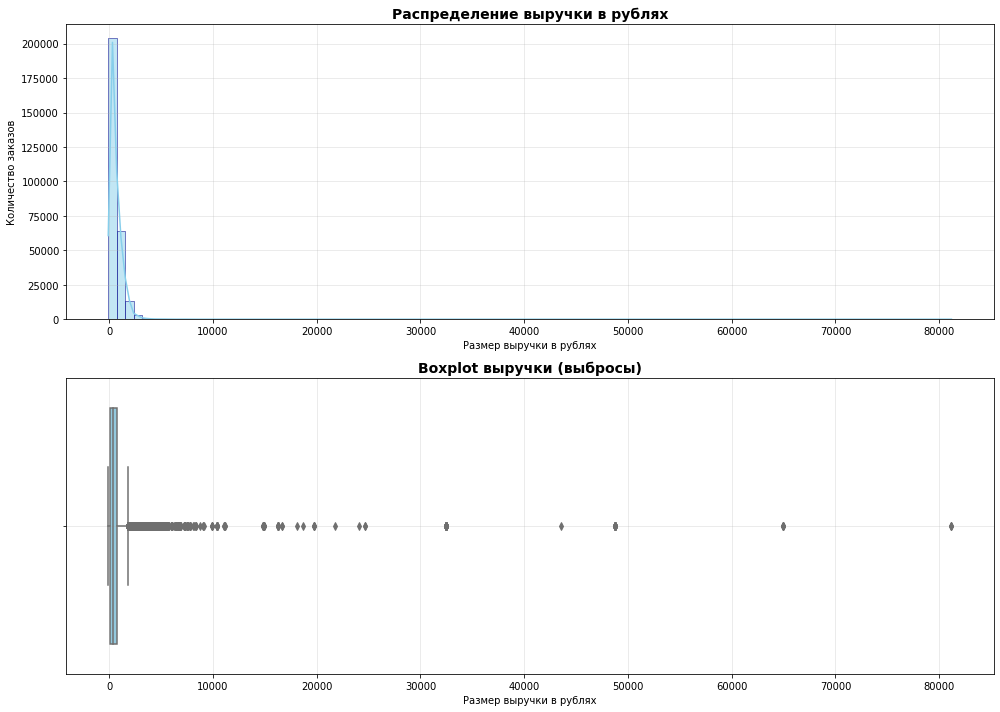

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Гистограмма
sns.histplot(data=df_rub, x='revenue', bins=100, color='skyblue', 
             edgecolor='darkblue', linewidth=0.5, ax=axes[0], kde=True)
axes[0].set_title('Распределение выручки в рублях', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Размер выручки в рублях')
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True, alpha=0.3)

# Boxplot
sns.boxplot(x=df_rub['revenue'], color='skyblue', ax=axes[1])
axes[1].set_title('Boxplot выручки (выбросы)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Размер выручки в рублях')
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

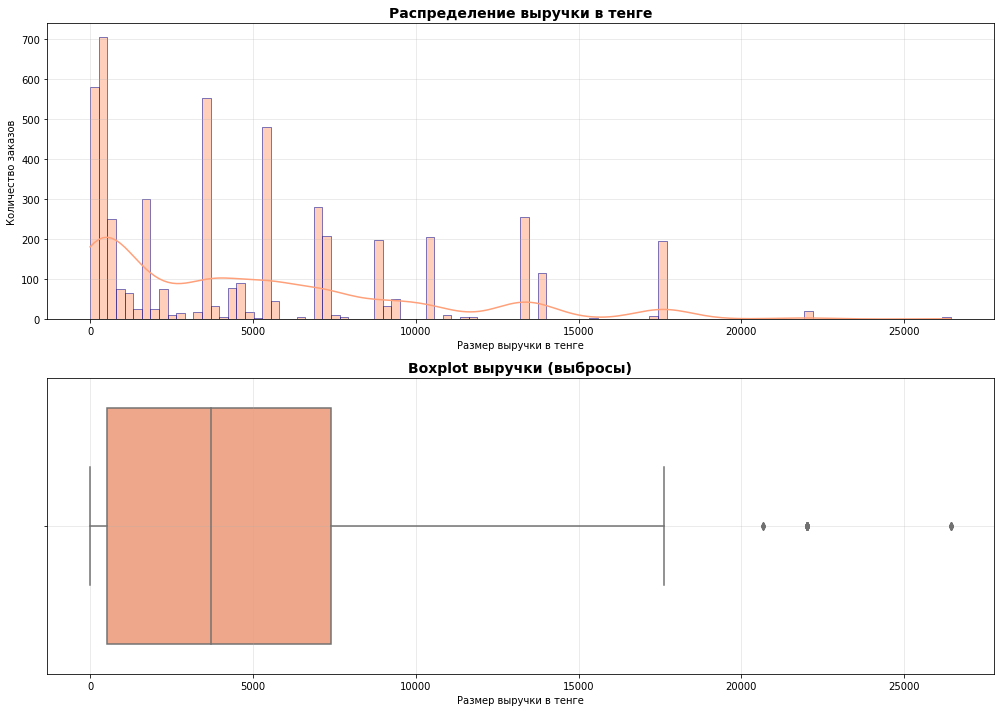

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Гистограмма
sns.histplot(data=df_kzt, x='revenue', bins=100, color='lightsalmon', 
             edgecolor='darkblue', linewidth=0.5, ax=axes[0], kde=True)
axes[0].set_title('Распределение выручки в тенге', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Размер выручки в тенге')
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True, alpha=0.3)

# Boxplot
sns.boxplot(x=df_kzt['revenue'], color='lightsalmon', ax=axes[1])
axes[1].set_title('Boxplot выручки (выбросы)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Размер выручки в тенге')
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

Построим диаграммы распределения количества билетов в валютах:

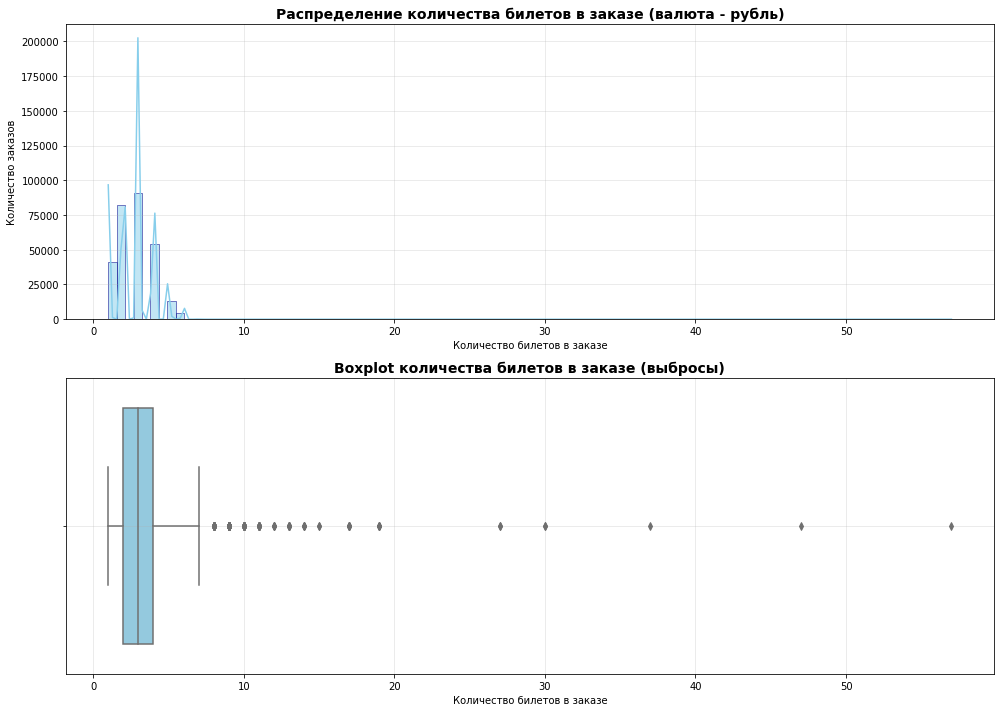

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Гистограмма
sns.histplot(data=df_rub, x='tickets_count', bins=100, color='skyblue', 
             edgecolor='darkblue', linewidth=0.5, ax=axes[0], kde=True)
axes[0].set_title('Распределение количества билетов в заказе (валюта - рубль)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Количество билетов в заказе')
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True, alpha=0.3)

# Boxplot
sns.boxplot(x=df_rub['tickets_count'], color='skyblue', ax=axes[1])
axes[1].set_title('Boxplot количества билетов в заказе (выбросы)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Количество билетов в заказе')
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

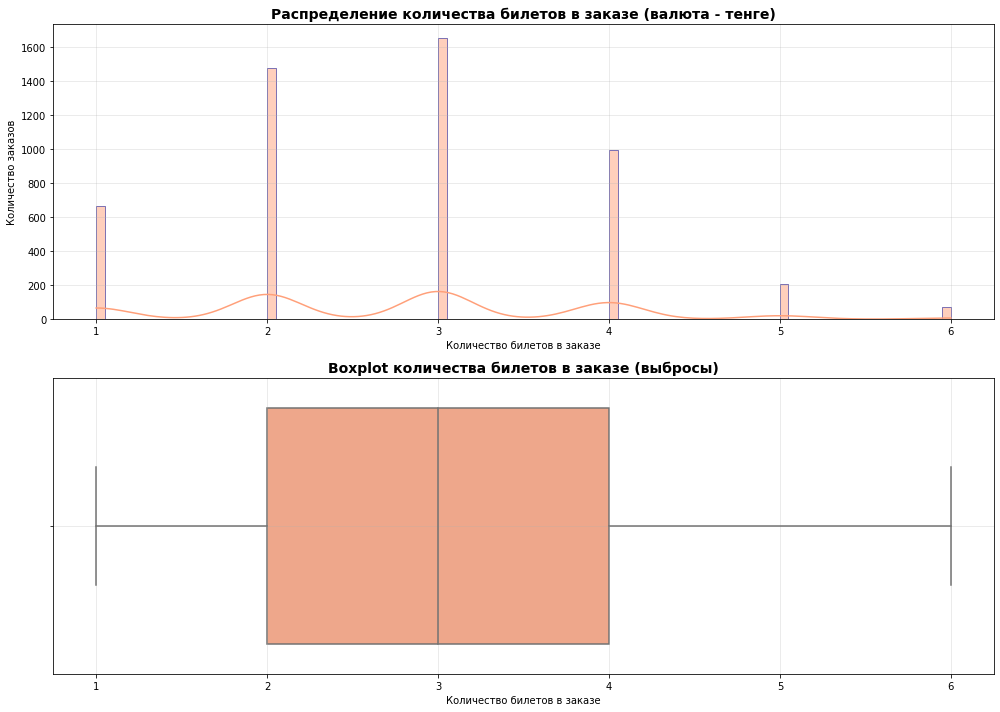

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Гистограмма
sns.histplot(data=df_kzt, x='tickets_count', bins=100, color='lightsalmon', 
             edgecolor='darkblue', linewidth=0.5, ax=axes[0], kde=True)
axes[0].set_title('Распределение количества билетов в заказе (валюта - тенге)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Количество билетов в заказе')
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True, alpha=0.3)

# Boxplot
sns.boxplot(x=df_kzt['tickets_count'], color='lightsalmon', ax=axes[1])
axes[1].set_title('Boxplot количества билетов в заказе (выбросы)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Количество билетов в заказе')
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

В наблюдаемых данных явно заметны выбросы. Отберем значения столбца `revenue` по 99-му процентилю:

In [26]:
df_rub_filtered = df_rub[df_rub['revenue'] <= df_rub['revenue'].quantile(.99)]
df_kzt_filtered = df_kzt[df_kzt['revenue'] <= df_kzt['revenue'].quantile(.99)]

Для дальнейшей работы необходимо соединить датафреймы:

In [27]:
df_main = pd.concat([df_rub_filtered, df_kzt_filtered])

In [28]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287752 entries, 0 to 290727
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                287752 non-null  int64  
 1   user_id                 287752 non-null  object 
 2   created_dt_msk          287752 non-null  object 
 3   created_ts_msk          287752 non-null  object 
 4   event_id                287752 non-null  int64  
 5   cinema_circuit          287752 non-null  object 
 6   age_limit               287752 non-null  int64  
 7   currency_code           287752 non-null  object 
 8   device_type_canonical   287752 non-null  object 
 9   revenue                 287752 non-null  float64
 10  service_name            287752 non-null  object 
 11  tickets_count           287752 non-null  int64  
 12  total                   287752 non-null  float64
 13  days_since_prev         266040 non-null  float64
 14  event_name          

In [29]:
print(f"Количество строк в датасете до фильтрации: {len(df_clean)}")
print(f"Количество строк в датасете после фильтрации: {len(df_main)}")
print(f"Процент отфильтрованных строк: {(len(df_clean) - len(df_main)) / len(df_clean) * 100:.2f}%")
print(f"Количество удаленных строк: {len(df_clean) - len(df_main)}")

Количество строк в датасете до фильтрации: 290581
Количество строк в датасете после фильтрации: 287752
Процент отфильтрованных строк: 0.97%
Количество удаленных строк: 2829


### Преобразование типов данных

Проведем преобразования типов данных некоторых столбцов в датафреймах `df_main` и `df_tenge`:

In [30]:
# Датафрейм df_main
# Преобразование к датам
df_main['created_dt_msk'] = pd.to_datetime(df_main['created_dt_msk'])
df_main['created_ts_msk'] = pd.to_datetime(df_main['created_ts_msk'])

# Преобразование к category
cat_cols = ['currency_code', 'device_type_canonical', 'service_name', 'cinema_circuit']
for col in cat_cols:
    df_main[col] = df_main[col].astype('category')
    
int_cols = ['tickets_count', 'days_since_prev', 'age_limit']
for col in int_cols:
    df_main[col] = pd.to_numeric(df_main[col], downcast='integer')
    
# Датафрейм df_tenge
df_tenge['data'] = pd.to_datetime(df_tenge['data'])
df_tenge['nominal'] = pd.to_numeric(df_tenge['nominal'], downcast='integer')

Проверим результат преобразований:

In [31]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287752 entries, 0 to 290727
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287752 non-null  int64         
 1   user_id                 287752 non-null  object        
 2   created_dt_msk          287752 non-null  datetime64[ns]
 3   created_ts_msk          287752 non-null  datetime64[ns]
 4   event_id                287752 non-null  int64         
 5   cinema_circuit          287752 non-null  category      
 6   age_limit               287752 non-null  int8          
 7   currency_code           287752 non-null  category      
 8   device_type_canonical   287752 non-null  category      
 9   revenue                 287752 non-null  float64       
 10  service_name            287752 non-null  category      
 11  tickets_count           287752 non-null  int8          
 12  total                   287752

In [32]:
df_tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int8          
 2   curs     357 non-null    float64       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int8(1), object(1)
memory usage: 8.8+ KB


### Создание новых столбцов

Создадим следующие столбцы:

- `revenue_rub` — выручка с заказа в единой валюте — российский рубль. Для этого используем датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю `final_tickets_tenge_df.csv` за 2024 год.
- `one_ticket_revenue_rub` — выручка с продажи одного билета на мероприятие.
- `month` — месяц оформления заказа.
- `season` — столбец с информацией о сезонности, включая такие категории, как: `лето`, `осень`, `зима`, `весна`.

Для этого необходимо объединить датафреймы `df_main` и `df_tenge`.

In [33]:
df = df_main.merge(
    df_tenge[['data', 'curs']],
    left_on = df_main['created_dt_msk'].dt.date,
    right_on = df_tenge['data'].dt.date,
    how = 'left')

# Удаляем служебную колонку key_0
df = df.drop(columns=['key_0'])

Проверим результат объединения датафреймов:

In [34]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287752 entries, 0 to 287751
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287752 non-null  int64         
 1   user_id                 287752 non-null  object        
 2   created_dt_msk          287752 non-null  datetime64[ns]
 3   created_ts_msk          287752 non-null  datetime64[ns]
 4   event_id                287752 non-null  int64         
 5   cinema_circuit          287752 non-null  category      
 6   age_limit               287752 non-null  int8          
 7   currency_code           287752 non-null  category      
 8   device_type_canonical   287752 non-null  category      
 9   revenue                 287752 non-null  float64       
 10  service_name            287752 non-null  category      
 11  tickets_count           287752 non-null  int8          
 12  total                   287752

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,curs
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,18.6972
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,18.3419
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,19.6475
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,18.5010
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,19.6648


Создадим новые столбцы:

In [35]:
# Конвертируем выручку из тенге в рубли
df['revenue_rub'] = np.where(
    df['currency_code'] == 'kzt',
    df['revenue'] * (df['curs'] / 100),  # тенге в рубли
    df['revenue']  # рубли остаются как есть
)

# Выручка с продажи одного билета на мероприятие
df['one_ticket_revenue_rub'] = df['revenue_rub'] / df['tickets_count']

# Номер месяца оформления заказа
df['month'] = df['created_dt_msk'].dt.month

# Категории лето, осень, зима, весна
month_numbers = [
    df['month'].isin([12, 1, 2]),     # зима
    df['month'].isin([3, 4, 5]),      # весна
    df['month'].isin([6, 7, 8]),      # лето
    df['month'].isin([9, 10, 11])     # осень
]

choices = ['зима', 'весна', 'лето', 'осень']

df['season'] = np.select(month_numbers, choices, default='неизвестно')

Проверим результаты выполненных действий:

In [36]:
df.info()
display(df.head(15))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287752 entries, 0 to 287751
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287752 non-null  int64         
 1   user_id                 287752 non-null  object        
 2   created_dt_msk          287752 non-null  datetime64[ns]
 3   created_ts_msk          287752 non-null  datetime64[ns]
 4   event_id                287752 non-null  int64         
 5   cinema_circuit          287752 non-null  category      
 6   age_limit               287752 non-null  int8          
 7   currency_code           287752 non-null  category      
 8   device_type_canonical   287752 non-null  category      
 9   revenue                 287752 non-null  float64       
 10  service_name            287752 non-null  category      
 11  tickets_count           287752 non-null  int8          
 12  total                   287752

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,city_id,venue_id,venue_name,venue_address,data,curs,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,18.6972,1521.94,380.485000,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,18.3419,289.45,144.725000,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,19.6475,1258.57,314.642500,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,18.5010,8.49,4.245000,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,19.6648,1390.41,463.470000,10,осень
5,2613713,000898990054619,2024-10-23,2024-10-23 15:12:00,500862,нет,12,rub,mobile,902.74,...,193.0,930.0,"Школа живописи ""Солнце"" Групп","бул. Отрадный, д. 4 стр. 1",2024-10-23,20.0531,902.74,300.913333,10,осень
6,6636941,00096d1f542ab2b,2024-08-15,2024-08-15 16:48:48,201953,нет,16,rub,desktop,917.83,...,213.0,4035.0,"Выставка ремесел ""Платформа"" Групп","алл. Горняцкая, д. 573",2024-08-15,18.7730,917.83,229.457500,8,лето
7,4657981,000a55a418c128c,2024-09-29,2024-09-29 19:39:12,265857,нет,12,rub,mobile,47.78,...,18.0,3159.0,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",2024-09-29,19.3741,47.78,47.780000,9,осень
8,4657952,000a55a418c128c,2024-10-15,2024-10-15 10:29:04,271579,нет,12,rub,mobile,74.84,...,18.0,3159.0,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",2024-10-15,19.7185,74.84,37.420000,10,осень
9,6818017,000cf0659a9f40f,2024-06-20,2024-06-20 10:35:26,516728,нет,12,rub,mobile,1421.91,...,35.0,4471.0,"Киновидеостудия ""Тон"" и партнеры","ул. Тихая, д. 69 стр. 669",2024-06-20,18.0419,1421.91,355.477500,6,лето


---
**Промежуточный вывод**
- Была проведена очистка строк от пропусков, проверка на дубликаты и фильтрация от выбросов:
    - Изначально строк с данными: 290849
    - После предобработки данных: 287782 строк
    - Процент исключенных строк: ≈ 1%
    - Количество удаленных строк: 3067
- Проверили категориальные данные, оценили количество уникальных значений в каждом категориальном столбце;
- Проанализировали количественные данные, посмотрели на статистические данные и распределения в столбцах `revenue` и `tickets_count`;
- Выполнили преобразования типов данных в датафреймах;
- Объединили все датафреймы в единый, в котором создали следующие столбцы:
	- `revenue_rub` — выручка с заказа в единой валюте — российский рубль. Для этого используем датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю `final_tickets_tenge_df.csv` за 2024 год;
	- `one_ticket_revenue_rub` — выручка с продажи одного билета на мероприятие;
	- `month — месяц оформления заказа`;
	- `season` — столбец с информацией о сезонности, включая такие категории, как: `лето`, `осень`, `зима`, `весна`.

[Переход к содержанию](#Содержимое-проекта)

## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения

Для каждого месяца найдем количество заказов и визуализирем результаты:

In [37]:
month_counts = df['month'].value_counts().sort_index()


display(month_counts)

6     34164
7     40407
8     44550
9     69352
10    99279
Name: month, dtype: int64

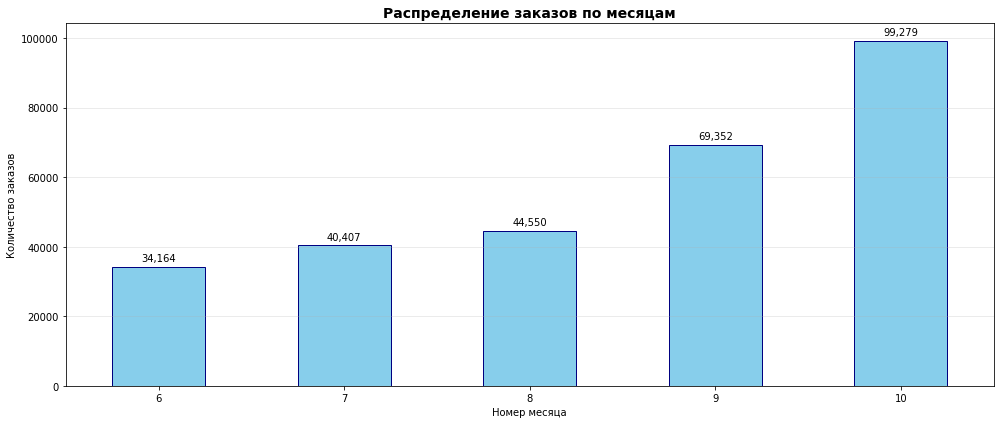

In [38]:
plt.figure(figsize=(14, 6))

ax = month_counts.plot(
    kind='bar',
    legend=False,
    xlabel='Номер месяца',
    ylabel='Количество заказов',
    color='skyblue',
    edgecolor='navy',
    rot=0
)

# Добавляем значения над столбцами
for i, v in enumerate(month_counts):
    ax.text(i, v + max(month_counts)*0.01, f'{v:,}', 
            ha='center', va='bottom', fontsize=10)



plt.title('Распределение заказов по месяцам', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [39]:
# Рассчитываем разницу между июнем и октябрем
june = month_counts[6]
october = month_counts[10]

difference = october - june
growth_percent = (difference / june) * 100
ratio = october / june

print("Сравненение июнь vs октябрь")
print("=" * 40)
print(f"Июнь:       {june:>8,} заказов")
print(f"Октябрь:    {october:>8,} заказов")
print(f"Разница:    {difference:>+8,} заказов")
print(f"Рост:       {growth_percent:>+8.1f}%")
print(f"Отношение:  {ratio:>8.1f}x (в {ratio:.1f} раза больше)")

Сравненение июнь vs октябрь
Июнь:         34,164 заказов
Октябрь:      99,279 заказов
Разница:     +65,115 заказов
Рост:         +190.6%
Отношение:       2.9x (в 2.9 раза больше)


Фиксируется увеличение заказов от июня к ноябрю 2024 года. В октябре заказов больше на 65120 шт., в процентом соотношении рост составляет 190,6%. Иначе говоря, к ноябрю 2024 года заказов стало в 2.9 раза больше.

---

Для осеннего и летнего периодов сравним распределение заказов билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу. 

,Лето (%),Осень (%),Изменение (п.п.)
концерты,42.618850,37.205496,-5.413354
другое,27.173210,19.702783,-7.470427
театр,20.099731,25.342315,5.242585
стендап,5.327356,4.105414,-1.221943
спорт,2.523485,11.196636,8.673152
выставки,2.028190,1.444574,-0.583616
ёлки,0.229179,1.002781,0.773602


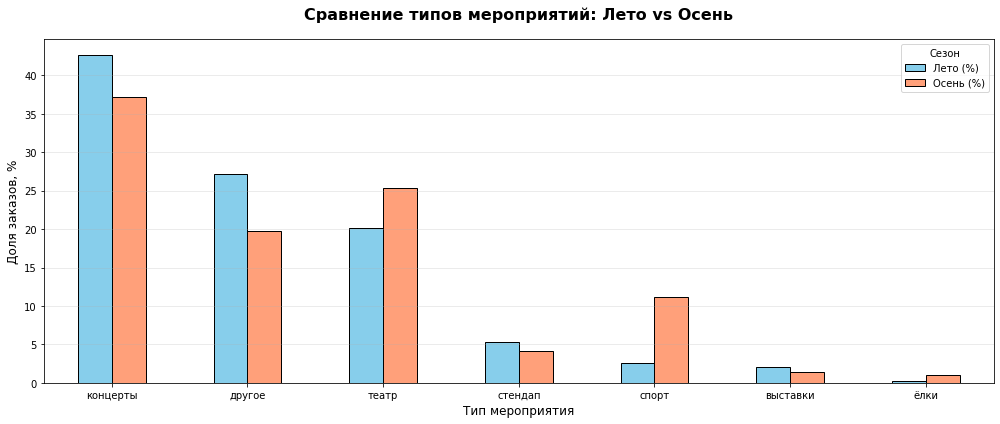

In [40]:
summer = df[df['season'] == 'лето']
autumn = df[df['season'] == 'осень']

# Создаем таблицы сравнения для типов мероприятий
summer_events = summer['event_type_main'].value_counts(normalize=True) * 100
autumn_events = autumn['event_type_main'].value_counts(normalize=True) * 100

events_type_df = pd.DataFrame({
    'Лето (%)': summer_events,
    'Осень (%)': autumn_events,
    'Изменение (п.п.)': autumn_events - summer_events
}).sort_values('Лето (%)', ascending=False)

display(events_type_df)


fig, ax = plt.subplots(figsize=(14, 6))

events_type_df[['Лето (%)', 'Осень (%)']].plot(
    kind='bar',
    color=['skyblue', 'lightsalmon'],
    edgecolor='black',
    ax=ax  # явно указываем ось
)

ax.set_title('Сравнение типов мероприятий: Лето vs Осень', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Тип мероприятия', fontsize=12)
ax.set_ylabel('Доля заказов, %', fontsize=12)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Сезон')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Лидирующие категории за оба сезона: `концерты`, `другое` и `театр`. Заметно изменение в долях заказов с изменением сезона. Доля заказов категорий `концерты`, `другое`, `стендап`, `выставки` к осени снизилась. Доля заказов категорий `театр`, `спорт`, `ёлки` к осени увеличилась. В категории `спорт` к осени доля заказов увеличилась примерно в **4.5 раза.**

,Лето (%),Осень (%),Изменение (п.п.)
mobile,80.641533,79.657951,-0.983581
desktop,19.358467,20.342049,0.983581


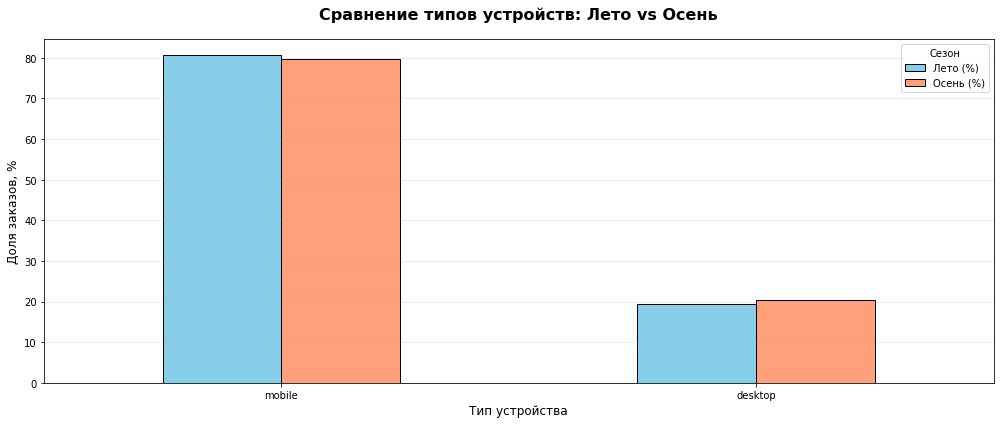

In [41]:
# Создаем таблицы сравнения для типов устройств
summer_devices = summer['device_type_canonical'].value_counts(normalize=True) * 100
autumn_devices = autumn['device_type_canonical'].value_counts(normalize=True) * 100

devices_type_df = pd.DataFrame({
    'Лето (%)': summer_devices,
    'Осень (%)': autumn_devices,
    'Изменение (п.п.)': autumn_devices - summer_devices
}).sort_values('Лето (%)', ascending=False)

display(devices_type_df)


fig, ax = plt.subplots(figsize=(14, 6))

devices_type_df[['Лето (%)', 'Осень (%)']].plot(
    kind='bar',
    color=['skyblue', 'lightsalmon'],
    edgecolor='black',
    ax=ax  # явно указываем ось
)

ax.set_title('Сравнение типов устройств: Лето vs Осень', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Тип устройства', fontsize=12)
ax.set_ylabel('Доля заказов, %', fontsize=12)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Сезон')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Исходя из данных, можно сделать вывод что сезонность не влияет на тип устройства, с которого делаются заказы. 

,Лето (%),Осень (%),Изменение (п.п.)
0,17.968284,23.618433,5.650149
6,18.194105,17.624280,-0.569825
12,20.537101,22.097361,1.560260
16,28.337573,26.221157,-2.116415
18,14.962937,10.438769,-4.524168


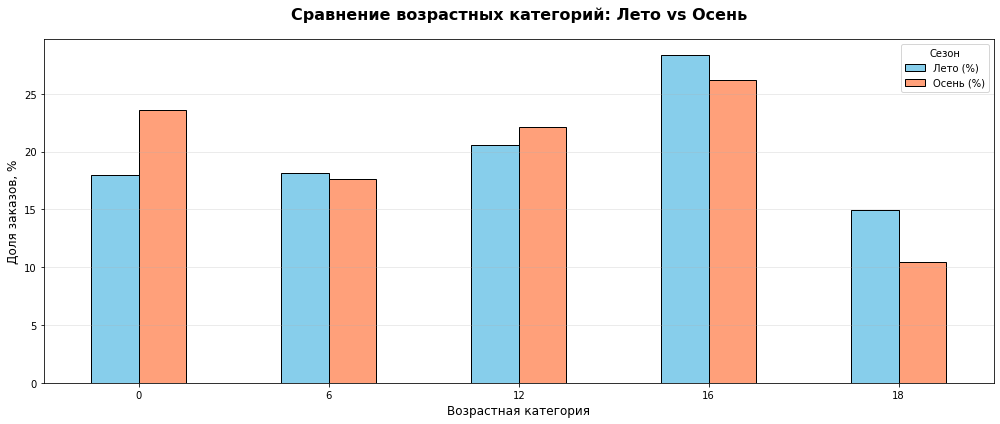

In [42]:
# Создаем таблицы сравнения для категорий возрастного рейтинга
summer_age_limits = summer['age_limit'].value_counts(normalize=True) * 100
autumn_age_limits = autumn['age_limit'].value_counts(normalize=True) * 100

age_limits_type_df = pd.DataFrame({
    'Лето (%)': summer_age_limits,
    'Осень (%)': autumn_age_limits,
    'Изменение (п.п.)': autumn_age_limits - summer_age_limits
})

display(age_limits_type_df)


fig, ax = plt.subplots(figsize=(14, 6))

age_limits_type_df[['Лето (%)', 'Осень (%)']].plot(
    kind='bar',
    color=['skyblue', 'lightsalmon'],
    edgecolor='black',
    ax=ax  # явно указываем ось
)

ax.set_title('Сравнение возрастных категорий: Лето vs Осень', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Возрастная категория', fontsize=12)
ax.set_ylabel('Доля заказов, %', fontsize=12)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Сезон')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

К осени возрастная группа `0` показывает рост на 5.65 п.п., в то время как категории `16` и `18` показывают спад на 2.12 и 4.52 п.п. соответственно. Можно предположить, что это связано с началом учебного года в школах, колледжах, вузах. 

К осени заметен небольшой рост у категории `12` (на 1.56 п.п.). Категория `6` имеет спад на 0.57 п.п. в доле заказов. 

---

Изучим изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью:

In [43]:
# Средние цены
print("Средняя цена билета:")
print(f"  Лето:  {summer['one_ticket_revenue_rub'].mean():.0f} руб.")
print(f"  Осень: {autumn['one_ticket_revenue_rub'].mean():.0f} руб.")

# Разница средних цен
change = autumn['one_ticket_revenue_rub'].mean() - summer['one_ticket_revenue_rub'].mean()
print(f"\nИзменение: {change:+.0f} руб.")

Средняя цена билета:
  Лето:  209 руб.
  Осень: 178 руб.

Изменение: -31 руб.


In [44]:
# Группируем по типу мероприятия
summer_prices = summer.groupby('event_type_main')['one_ticket_revenue_rub'].mean()
autumn_prices = autumn.groupby('event_type_main')['one_ticket_revenue_rub'].mean()

# Объединяем в одну таблицу
price_comparison = pd.DataFrame({
    'Лето': summer_prices,
    'Осень': autumn_prices
}).sort_values('Лето', ascending=False)


# Разницу в рублях
price_comparison['Разница (руб)'] = price_comparison['Осень'] - price_comparison['Лето']

# Относительное изменение в %
price_comparison['Изменение (%)'] = (price_comparison['Разница (руб)'] / price_comparison['Лето']) * 100


display(price_comparison.round(2))

,Лето,Осень,Разница (руб),Изменение (%)
event_type_main,,,,
концерты,304.79,268.36,-36.43,-11.95
ёлки,271.44,229.59,-41.85,-15.42
стендап,218.52,231.12,12.61,5.77
театр,214.14,175.97,-38.17,-17.82
выставки,86.42,90.60,4.19,4.85
другое,77.43,76.12,-1.32,-1.70
спорт,50.76,49.97,-0.79,-1.56


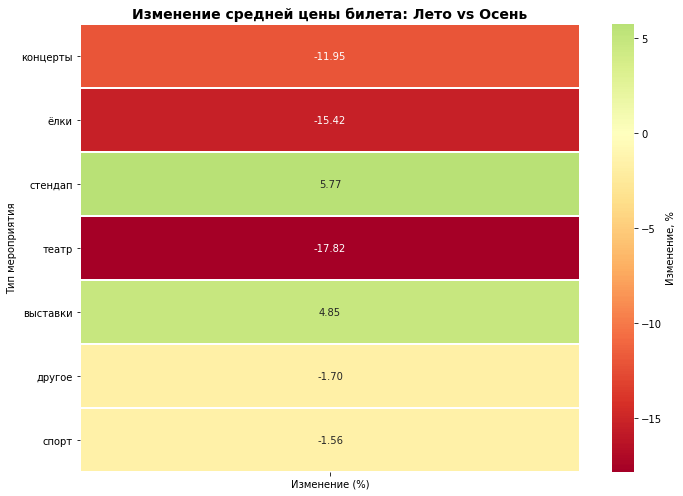

In [45]:
plt.figure(figsize=(10, 7))

sns.heatmap(
    data=price_comparison[['Изменение (%)']],
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',
    center=0,
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Изменение, %'}
)

plt.title('Изменение средней цены билета: Лето vs Осень', fontsize=14, fontweight='bold')
plt.ylabel('Тип мероприятия')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Исходя из данных можно сделать вывод, что отрицательное изменение средней цены билета наблюдается в пяти категориях (`концерты`, `ёлки`, `театр`, `другое`, `спорт`). Категории `стендап`, `выставки` показывают рост средней цены билета. Наибольшая средняя цена за билет наблюдается у категории `концерты` (304.79 руб летом и 268.35 руб осенью), наименьшая у `спорт` (50.76 руб летом и 49.96 руб осенью).

**Общий рост заказов к осени (×2.9)**
   - *Вероятная причина:* Активное начало сезона, возвращение целевой аудитории из отпусков, предновогодний ажиотаж.

**Перераспределение долей категорий**
   - *Вероятная причина:* Естественная смена форматов (с летних open-air на осенние indoor-мероприятия), начало спортивных сезонов.

**Сдвиг возрастной аудитории**
   - *Вероятная причина:* Учебный график влияет на доступность досуга для студентов, родители активизируются в поиске детских мероприятий. Также есть взаимосвязь с началом учебного сезона.
   
**Изменение средней цены билета**
   - *Вероятная причина:* Изменения могут быть связаны со сменой форматов мероприятий (переход от летних open-air к осенним indoor-площадкам), а также с корректировкой ценовой политики организаторов в преддверии высокоспросного сезона.

 ### Осенняя активность пользователей

In [46]:
# Группируем по дням
daily_stats = autumn.groupby(autumn['created_dt_msk'].dt.date).agg(
    total_orders=('order_id', 'count'),           # общее число заказов
    dau=('user_id', 'nunique'),                   # количество активных пользователей
    avg_ticket_price=('one_ticket_revenue_rub', 'mean')  # средняя цена билета
).reset_index()

# Переименовываем колонку с датой
daily_stats = daily_stats.rename(columns={'created_dt_msk': 'date'})

# Добавляем заказы на пользователя
daily_stats['orders_per_user'] = daily_stats['total_orders'] / daily_stats['dau']

display(daily_stats.head(10))

,date,total_orders,dau,avg_ticket_price,orders_per_user
0,2024-09-01,1327,564,200.168708,2.352837
1,2024-09-02,1380,574,189.464639,2.404181
2,2024-09-03,5113,778,80.350151,6.571979
3,2024-09-04,1773,686,178.048069,2.584548
4,2024-09-05,1944,739,189.510156,2.630582
5,2024-09-06,2126,864,175.309692,2.460648
6,2024-09-07,1958,794,190.241297,2.465995
7,2024-09-08,1713,717,181.973169,2.389121
8,2024-09-09,2094,779,159.653431,2.688062
9,2024-09-10,2024,764,184.053745,2.649215


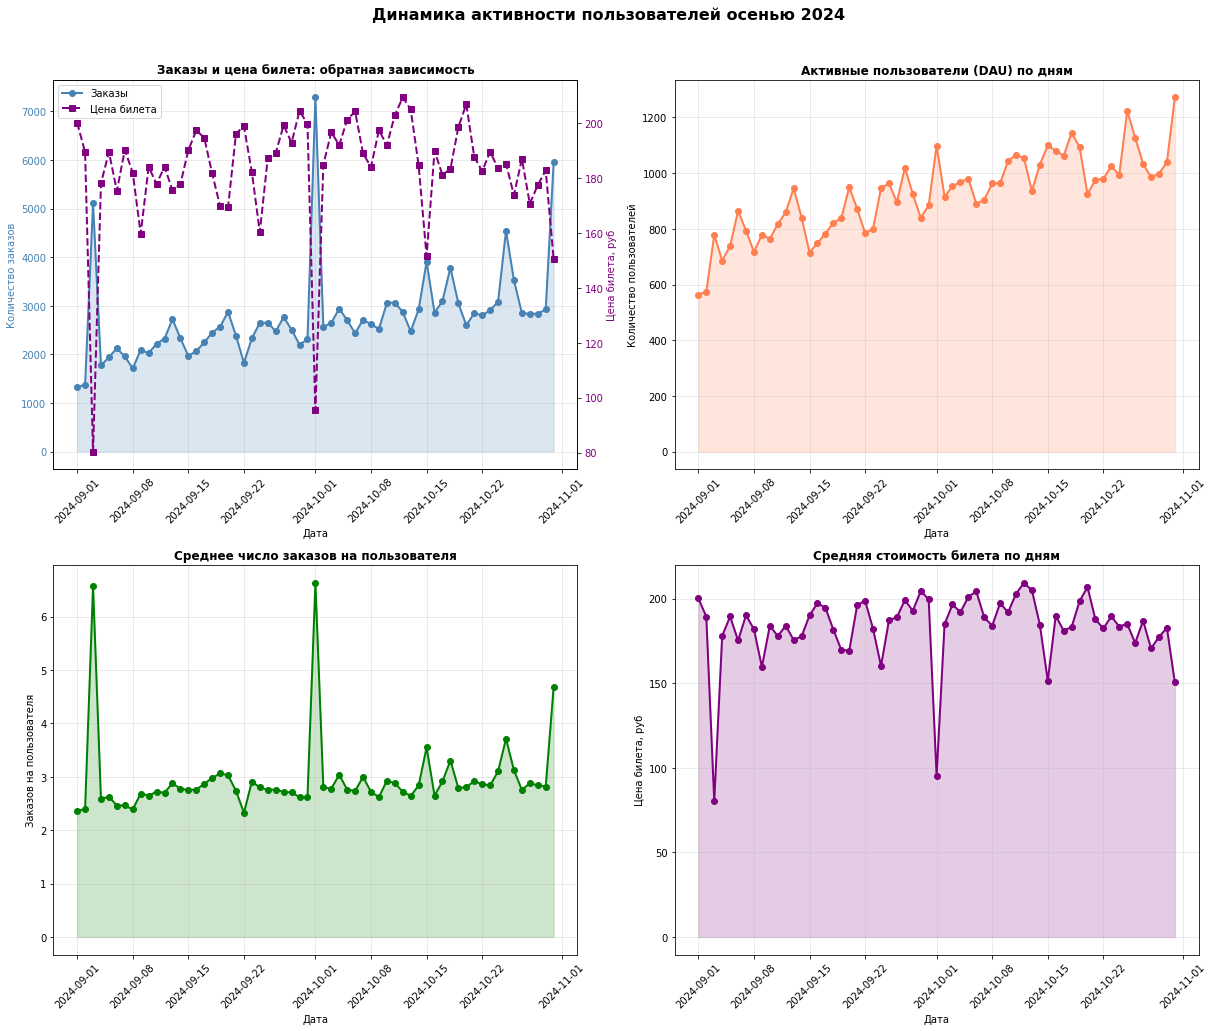

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(17, 14))

# Общее число заказов И Средняя стоимость билета на одном графике
ax1 = axes[0, 0]
ax1.plot(daily_stats['date'], daily_stats['total_orders'], 
         marker='o', linewidth=2, color='steelblue', label='Заказы')
ax1.fill_between(daily_stats['date'], daily_stats['total_orders'], 
                 alpha=0.2, color='steelblue')
ax1.set_title('Заказы и цена билета: обратная зависимость', fontweight='bold')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество заказов', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Вторая ось Y для цены билета
ax1_twin = ax1.twinx()
ax1_twin.plot(daily_stats['date'], daily_stats['avg_ticket_price'], 
              marker='s', linewidth=2, color='purple', linestyle='--', label='Цена билета')
ax1_twin.set_ylabel('Цена билета, руб', color='purple')
ax1_twin.tick_params(axis='y', labelcolor='purple')

# Объединяем легенды
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')


# DAU (активные пользователи)
axes[0, 1].plot(daily_stats['date'], daily_stats['dau'], 
                marker='o', linewidth=2, color='coral')
axes[0, 1].fill_between(daily_stats['date'], daily_stats['dau'], 
                        alpha=0.2, color='coral')
axes[0, 1].set_title('Активные пользователи (DAU) по дням', fontweight='bold')
axes[0, 1].set_xlabel('Дата')
axes[0, 1].set_ylabel('Количество пользователей')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Среднее число заказов на пользователя
axes[1, 0].plot(daily_stats['date'], daily_stats['orders_per_user'], 
                marker='o', linewidth=2, color='green')
axes[1, 0].fill_between(daily_stats['date'], daily_stats['orders_per_user'], 
                        alpha=0.2, color='green')
axes[1, 0].set_title('Среднее число заказов на пользователя', fontweight='bold')
axes[1, 0].set_xlabel('Дата')
axes[1, 0].set_ylabel('Заказов на пользователя')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Средняя стоимость билета
axes[1, 1].plot(daily_stats['date'], daily_stats['avg_ticket_price'], 
                marker='o', linewidth=2, color='purple')
axes[1, 1].fill_between(daily_stats['date'], daily_stats['avg_ticket_price'], 
                        alpha=0.2, color='purple')
axes[1, 1].set_title('Средняя стоимость билета по дням', fontweight='bold')
axes[1, 1].set_xlabel('Дата')
axes[1, 1].set_ylabel('Цена билета, руб')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)



plt.suptitle('Динамика активности пользователей осенью 2024', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

- `Общее число заказов по дням`: наблюдается положительная динамика роста количества заказов, с ярковыраженными скачками количества заказов;
- `Активные пользователи (DAU) по дням`: наблюдается положительная динамика роста показателя DAU;
- `Среднее число заказов на пользователя`: наблюдается положительная динамика роста среднего числа заказов, с ярковыраженными скачками. Даты скачков на графике совпадают с графиком `Общее число заказов по дням`;
- `Средняя стоимость билета по дням`: наблюдаются отрицательные скачки в средней стоимости билета, заметно, что отрицательные скачки совпадают с положительными скачками у числа заказов и среднего числа заказов на пользователя. К концу октября заметен спад показателя.

Скачки в графиках можно связать с проведением с крупных мероприятий, выступлениями известных артистов и акционными предложениями на билеты. 

---

Изучим недельную цикличность. Выделив день недели и сравним пользовательскую активность в будни и выходные:

In [48]:
# Добавляем день недели
daily_stats['day_of_week'] = daily_stats['date'].apply(lambda x: x.weekday())  # 0 = понедельник, 6 = воскресенье

daily_stats['day_name'] = daily_stats['date'].apply(lambda x: x.strftime('%A'))
# Русские названия дней
russian_days = {
    0: 'Понедельник',
    1: 'Вторник', 
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
}

daily_stats['day_name_ru'] = daily_stats['day_of_week'].map(russian_days)

daily_stats['is_weekend'] = daily_stats['day_of_week'].isin([5, 6])  # 5 = суббота, 6 = воскресенье


In [49]:
# Группируем по будням/выходным
weekend_comparison = daily_stats.groupby('is_weekend').agg(
    avg_total_orders=('total_orders', 'mean'),
    avg_dau=('dau', 'mean'),
    avg_orders_per_user=('orders_per_user', 'mean'),
    avg_ticket_price=('avg_ticket_price', 'mean')
)

weekend_comparison.index = ['Будни', 'Выходные']
display(weekend_comparison)

,avg_total_orders,avg_dau,avg_orders_per_user,avg_ticket_price
Будни,2906.772727,937.409091,3.065792,178.612391
Выходные,2396.058824,887.823529,2.675162,195.221735


In [50]:
# Группируем по дням недели (от понедельника до воскресенья)
weekday_stats = daily_stats.groupby('day_name_ru').agg(
    total_orders=('total_orders', 'sum'),          # Общее кол-во заказов
    unique_users=('dau', 'sum'),                   # Уникальные пользователи (суммируем DAU по дням)
    revenue=('avg_ticket_price', lambda x: (x * daily_stats.loc[x.index, 'total_orders']).sum()),  # Выручка
    avg_orders_per_user=('orders_per_user', 'mean'),  # Ср. заказов на пользователя
    avg_revenue_per_user=('avg_ticket_price', 'mean')  # Ср. выручка на пользователя
)

# Приводим к правильному порядку дней
day_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
weekday_stats = weekday_stats.reindex(day_order)

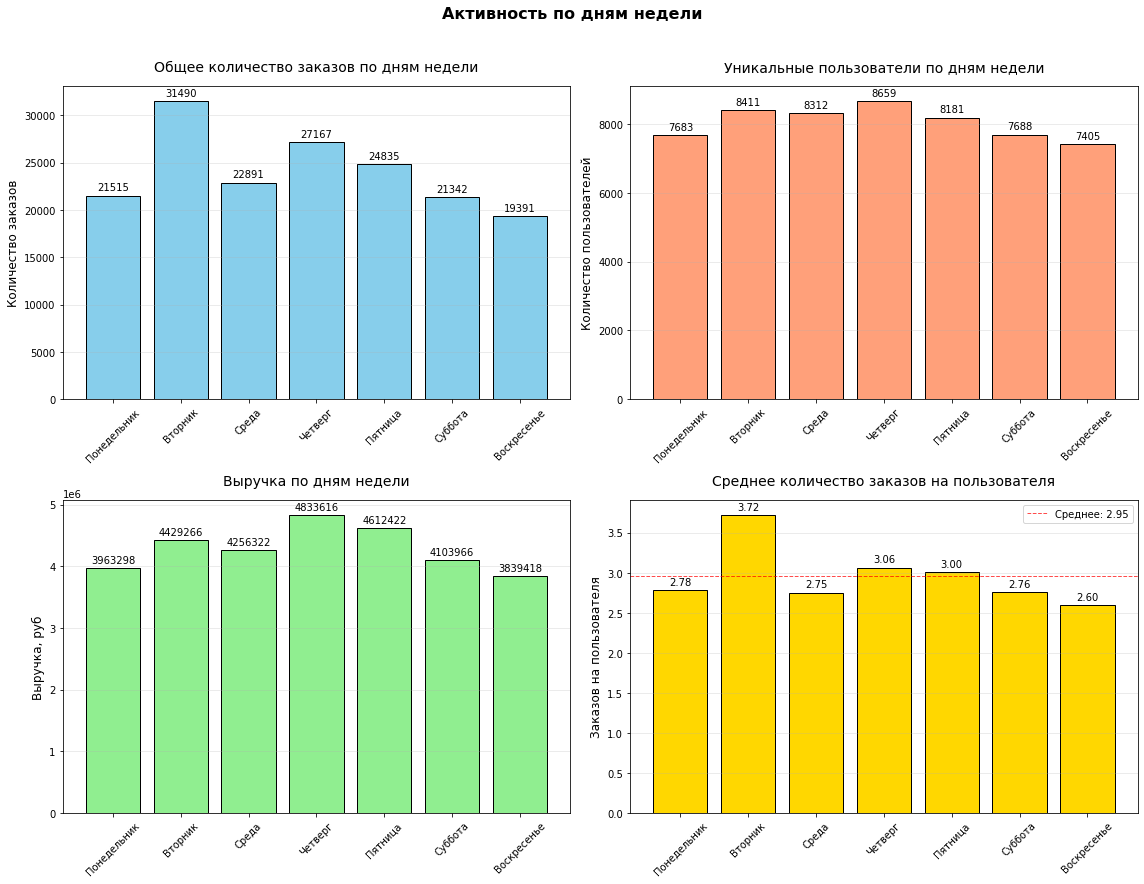

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Активность по дням недели', fontsize=16, fontweight='bold', y=1.02)

# Общее количество заказов по дням недели
bars1 = axes[0, 0].bar(weekday_stats.index, weekday_stats['total_orders'], 
                       color='skyblue', edgecolor='black')
axes[0, 0].set_title('Общее количество заказов по дням недели', fontsize=14, pad=15)
axes[0, 0].set_ylabel('Количество заказов', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)
# Добавляем значения
for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01*max(weekday_stats['total_orders']),
                   f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Уникальные пользователи по дням недели
bars2 = axes[0, 1].bar(weekday_stats.index, weekday_stats['unique_users'], 
                       color='lightsalmon', edgecolor='black')
axes[0, 1].set_title('Уникальные пользователи по дням недели', fontsize=14, pad=15)
axes[0, 1].set_ylabel('Количество пользователей', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)
# Добавляем значения
for bar in bars2:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01*max(weekday_stats['unique_users']),
                   f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Выручка по дням недели
bars3 = axes[1, 0].bar(weekday_stats.index, weekday_stats['revenue'], 
                       color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Выручка по дням недели', fontsize=14, pad=15)
axes[1, 0].set_ylabel('Выручка, руб', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)
# Добавляем значения
for bar in bars3:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01*max(weekday_stats['revenue']),
                   f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Среднее количество заказов на пользователя по дням недели
bars4 = axes[1, 1].bar(weekday_stats.index, weekday_stats['avg_orders_per_user'], 
                       color='gold', edgecolor='black')
axes[1, 1].set_title('Среднее количество заказов на пользователя', fontsize=14, pad=15)
axes[1, 1].set_ylabel('Заказов на пользователя', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)
# Добавляем значенияы
for bar in bars4:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01*max(weekday_stats['avg_orders_per_user']),
                   f'{height:.2f}', ha='center', va='bottom', fontsize=10)
# Добавляем горизонтальную линию среднего
mean_value = weekday_stats['avg_orders_per_user'].mean()
axes[1, 1].axhline(y=mean_value, color='red', linestyle='--', linewidth=1, alpha=0.7,
                   label=f'Среднее: {mean_value:.2f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

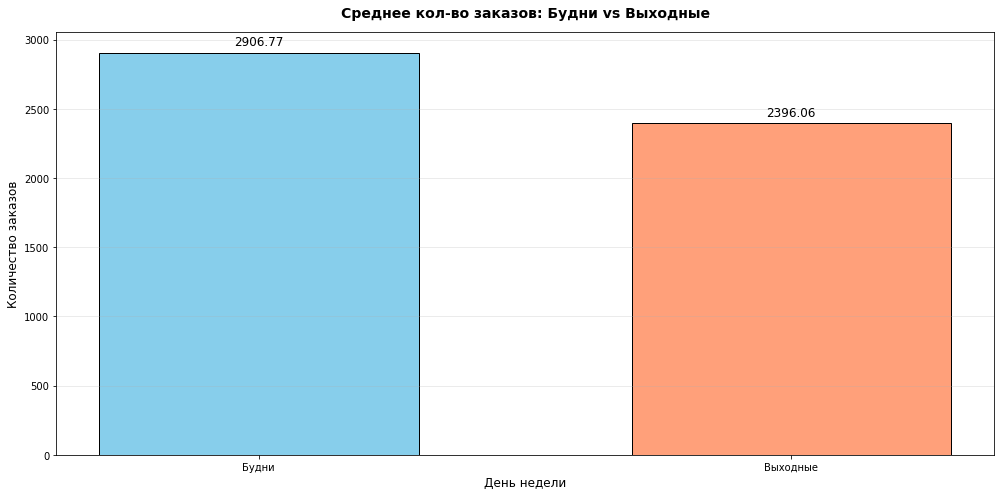

In [52]:
categories = ['Будни', 'Выходные']
colors = ['skyblue', 'lightsalmon']

values = [
    weekend_comparison.loc['Будни', 'avg_total_orders'],
    weekend_comparison.loc['Выходные', 'avg_total_orders']
]

# График для средних заказов
fig, ax = plt.subplots(figsize=(14, 7))

bars = ax.bar(categories, values, color=colors, edgecolor='black', width=0.6)

# Настройки
ax.set_title('Среднее кол-во заказов: Будни vs Выходные', fontsize=14, fontweight='bold', pad=15)
ax.set_ylabel('Количество заказов', fontsize=12)
ax.set_xlabel('День недели', fontsize=12)

# Добавляем значения на столбцы
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01*max(values),
            f'{val:.2f}', ha='center', va='bottom', fontsize=12)

ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Промежуточные выводы по недельной динамике:

1. **Пиковые дни для заказов** — вторник, четверг и пятница. Можно предположить, что пользователи планируют досуг заранее, а не спонтанно. Возможно, в эти дни активизируются маркетинговые кампании или действуют специальные предложения, стимулирующие покупки. Выходные дни показывают снижение по сравнению с буднями.

2. **Активность пользователей** равномерно высокая в течение всей недели (от 7 405 до 8 659 уникальных пользователей в день). Максимум наблюдается в четверг, минимум — в воскресенье. Стабильность DAU указывает на сформированную привычку пользоваться сервисом независимо от дня недели.

3. **Выручка** достигает пика в четверг (4,83 млн руб.) и пятницу (4,61 млн руб.), с постепенным снижением к концу недели. **Воскресенье показывает минимальную общую выручку** (3,84 млн руб.). Это может быть связано с несколькими факторами:
   - Основные покупки совершаются **заранее** (в середине недели).
   - В воскресенье остаются в основном **спонтанные или низкобюджетные** покупки.
   - Возможно, в конце недели **менее дорогие** мероприятия или действуют скидки для заполнения залов.

4. **Среднее количество заказов на пользователя** колеблется от 2,60 (воскресенье) до 3,72 (четверг) — в среднем около 3 билетов на пользователя. Более высокие показатели в будние дни, в сравнении с выходными, говорят о повышенной вовлечённости пользователей в дни активного планирования.

**Итого** — в будни пользователи планируют и покупают, в выходные — потребляют купленные услуги.

### Популярные события и партнёры

Для каждого региона опредилим уникальное количество мероприятий и общее число заказов за осень:

In [53]:
region_stats = autumn.groupby('region_name').agg(
    unique_events_qty=('event_id', 'nunique'),    # количество уникальных мероприятий
    total_orders=('order_id', 'count')            # общее количество заказов
).sort_values('unique_events_qty', ascending=False)

# Общее количество мероприятий и заказов
total_events = autumn['event_id'].nunique()
total_orders = autumn['order_id'].count()

# Считаем доли (в процентах)
region_stats['events_share'] = (region_stats['unique_events_qty'] / total_events * 100).round(2)
region_stats['orders_share'] = (region_stats['total_orders'] / total_orders * 100).round(2)

display(region_stats.head(10))

,unique_events_qty,total_orders,events_share,orders_share
region_name,,,,
Каменевский регион,3910,46684,24.63,27.68
Североярская область,2613,20718,16.46,12.29
Широковская область,803,8715,5.06,5.17
Светополянский округ,764,4779,4.81,2.83
Речиновская область,529,3565,3.33,2.11
Серебринская область,456,4467,2.87,2.65
Яблоневская область,432,4199,2.72,2.49
Тепляковская область,419,2485,2.64,1.47
Горицветская область,406,3230,2.56,1.92


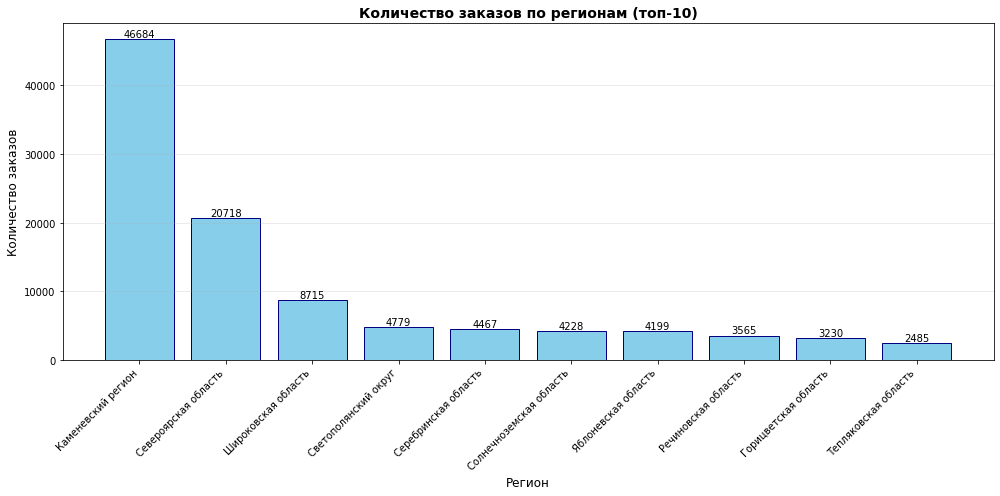

In [54]:
plt.figure(figsize=(14, 7))

top_10_orders = region_stats.head(10).reset_index().sort_values('orders_share', ascending=False)

bars = plt.bar(top_10_orders['region_name'], 
               top_10_orders['total_orders'], 
               color='skyblue', 
               edgecolor='navy')

plt.title('Количество заказов по регионам (топ-10)', fontsize=14, fontweight='bold')
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{height}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

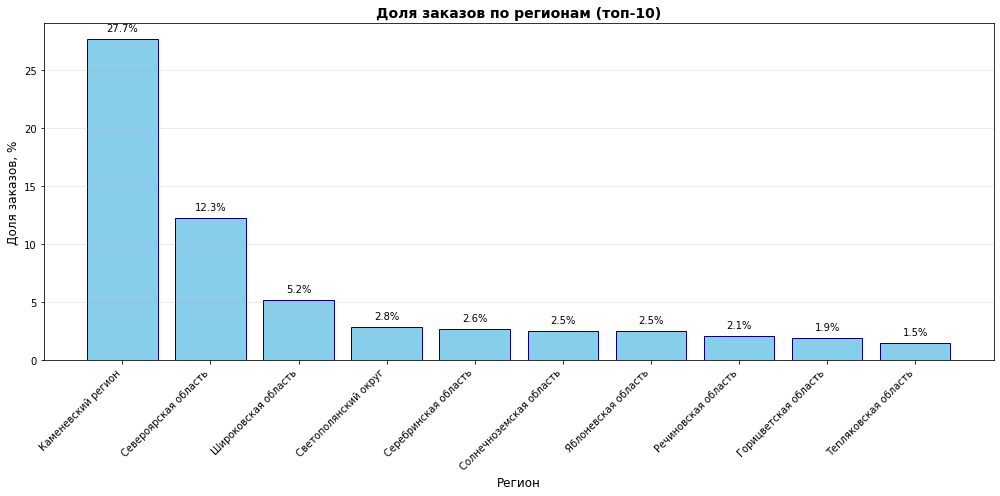

In [55]:
plt.figure(figsize=(14, 7))


bars = plt.bar(top_10_orders['region_name'], 
               top_10_orders['orders_share'], 
               color='skyblue', 
               edgecolor='navy')

plt.title('Доля заказов по регионам (топ-10)', fontsize=14, fontweight='bold')
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Доля заказов, %', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

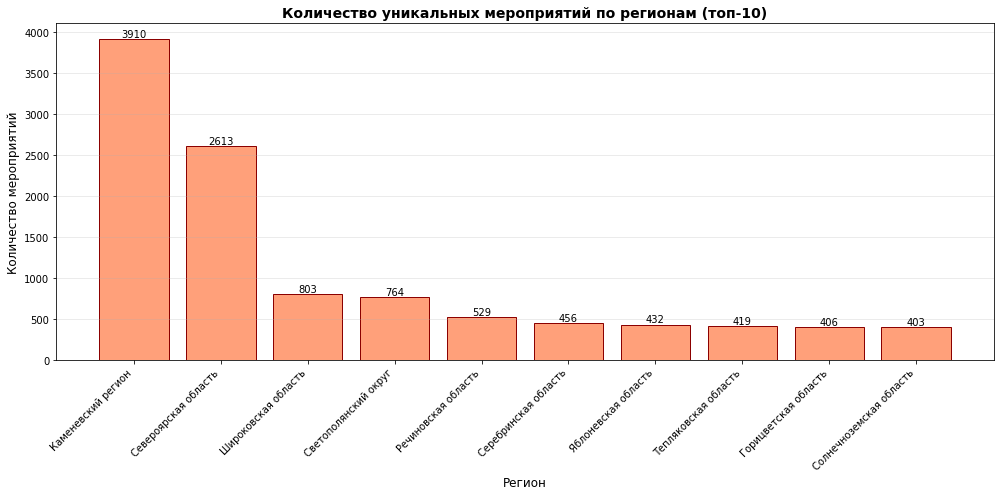

In [56]:
plt.figure(figsize=(14, 7))

top_10_events = region_stats.head(10).reset_index().sort_values('events_share', ascending=False)

bars = plt.bar(top_10_events['region_name'], 
               top_10_events['unique_events_qty'], 
               color='lightsalmon', 
               edgecolor='darkred')

plt.title('Количество уникальных мероприятий по регионам (топ-10)', fontsize=14, fontweight='bold')
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Количество мероприятий', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{height}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

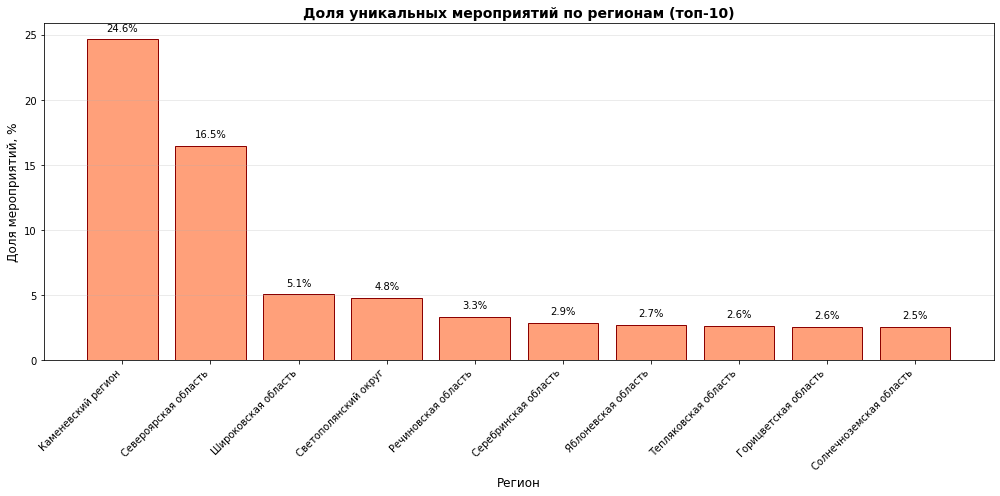

In [57]:
plt.figure(figsize=(14, 7))

bars = plt.bar(top_10_events['region_name'], 
               top_10_events['events_share'], 
               color='lightsalmon', 
               edgecolor='darkred')

plt.title('Доля уникальных мероприятий по регионам (топ-10)', fontsize=14, fontweight='bold')
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Доля мероприятий, %', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Абсолютные лидеры в разнообразии уникальных мероприятий: `Каменевский регион` (24.63% от общего числа уникальных мероприятий) и `Североярская область` (16.46% от общего числа уникальных мероприятий). Эти же регионы являются лидерами в доле общего числа заказов 27.68% и 12.29% соответственно.

---

Для каждого билетного партнёра определим общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов:

In [58]:
partner_stats = autumn.groupby('service_name').agg(
    unique_events_qty=('event_id', 'nunique'),    # количество уникальных мероприятий
    total_orders=('order_id', 'count'),           # общее количество заказов
    total_revenue=('revenue_rub', 'sum')
).sort_values('unique_events_qty', ascending=False).reset_index()

partner_stats['total_revenue'] = partner_stats['total_revenue'].round(2)

total_events = partner_stats['unique_events_qty'].sum()
total_orders = partner_stats['total_orders'].sum()
total_revenue = partner_stats['total_revenue'].sum()

partner_stats['events_share'] = (partner_stats['unique_events_qty'] / total_events * 100).round(2)
partner_stats['orders_share'] = (partner_stats['total_orders'] / total_orders * 100).round(2)
partner_stats['revenue_share'] = (partner_stats['total_revenue'] / total_revenue * 100).round(2)

display(partner_stats.head(10))

,service_name,unique_events_qty,total_orders,total_revenue,events_share,orders_share,revenue_share
0,Лови билет!,3616,25794,10381935.08,20.90,15.30,12.68
1,Билеты без проблем,2847,32405,12172562.75,16.46,19.22,14.86
2,Билеты в руки,2469,25728,7613383.38,14.27,15.26,9.30
3,Облачко,1409,15478,10611051.69,8.15,9.18,12.96
4,Лучшие билеты,1396,12432,1676010.07,8.07,7.37,2.05
5,Мой билет,1005,19416,10850676.20,5.81,11.51,13.25
6,Тебе билет!,859,3760,2166179.14,4.97,2.23,2.65
7,Прачечная,728,5798,2548310.47,4.21,3.44,3.11
8,Весь в билетах,599,9416,9351278.66,3.46,5.58,11.42
9,Яблоко,537,3473,2763332.31,3.10,2.06,3.37


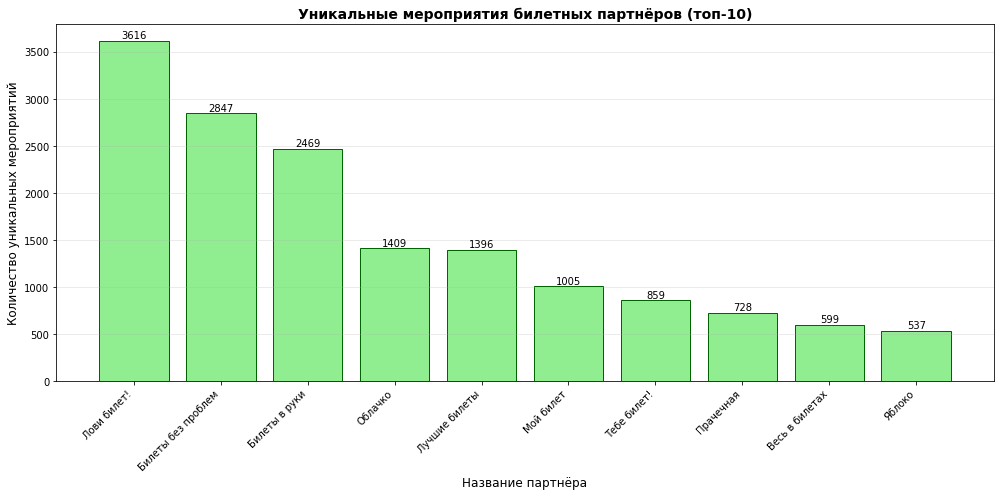

In [59]:
plt.figure(figsize=(14, 7))

top_10_partners_events = partner_stats.head(10)

bars = plt.bar(top_10_partners_events['service_name'], 
               top_10_partners_events['unique_events_qty'], 
               color='lightgreen', 
               edgecolor='darkgreen')

plt.title('Уникальные мероприятия билетных партнёров (топ-10)', fontsize=14, fontweight='bold')
plt.xlabel('Название партнёра', fontsize=12)
plt.ylabel('Количество уникальных мероприятий', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{height}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

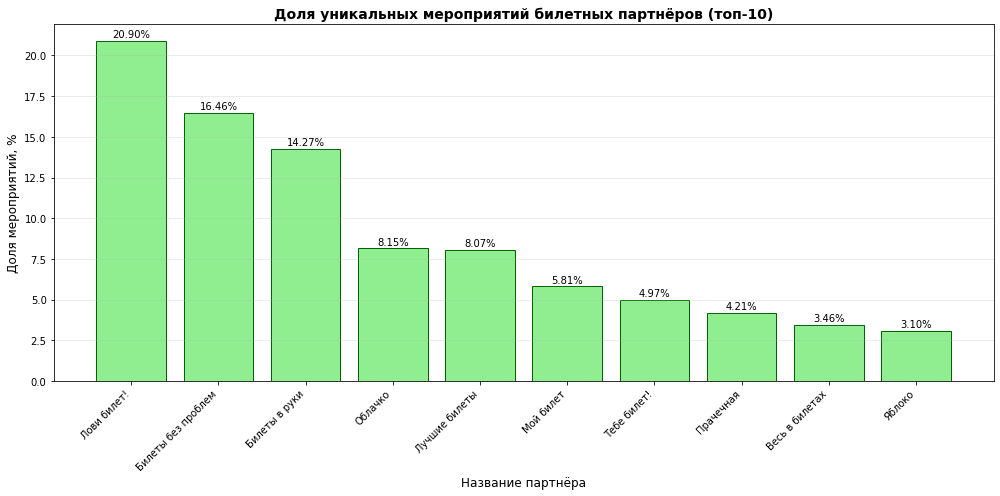

In [60]:
plt.figure(figsize=(14, 7))

top_10_partners_events = partner_stats.head(10)

bars = plt.bar(top_10_partners_events['service_name'], 
               top_10_partners_events['events_share'], 
               color='lightgreen', 
               edgecolor='darkgreen')

plt.title('Доля уникальных мероприятий билетных партнёров (топ-10)', fontsize=14, fontweight='bold')
plt.xlabel('Название партнёра', fontsize=12)
plt.ylabel('Доля мероприятий, %', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

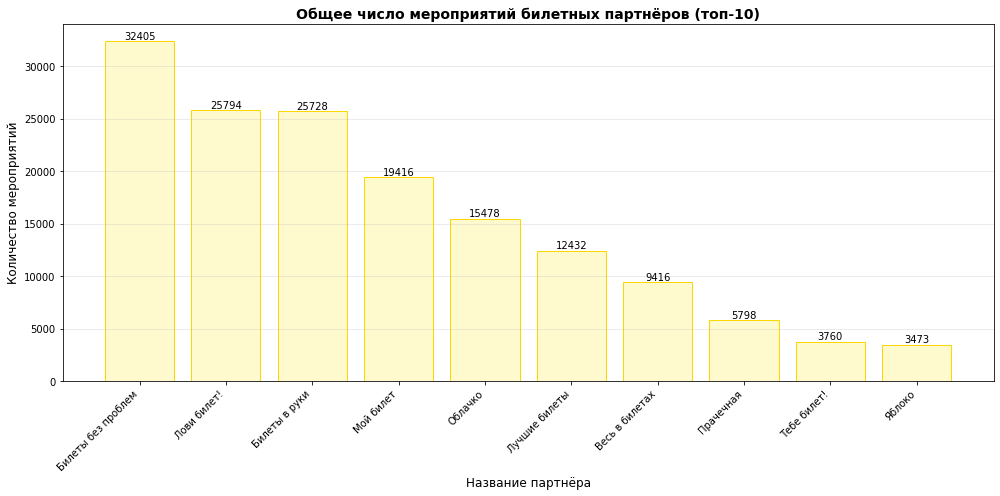

In [61]:
plt.figure(figsize=(14, 7))

top_10_partners_orders = partner_stats.head(10).sort_values('total_orders', ascending=False)

bars = plt.bar(top_10_partners_orders['service_name'], 
               top_10_partners_orders['total_orders'], 
               color='LemonChiffon', 
               edgecolor='gold')

plt.title('Общее число мероприятий билетных партнёров (топ-10)', fontsize=14, fontweight='bold')
plt.xlabel('Название партнёра', fontsize=12)
plt.ylabel('Количество мероприятий', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{height}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

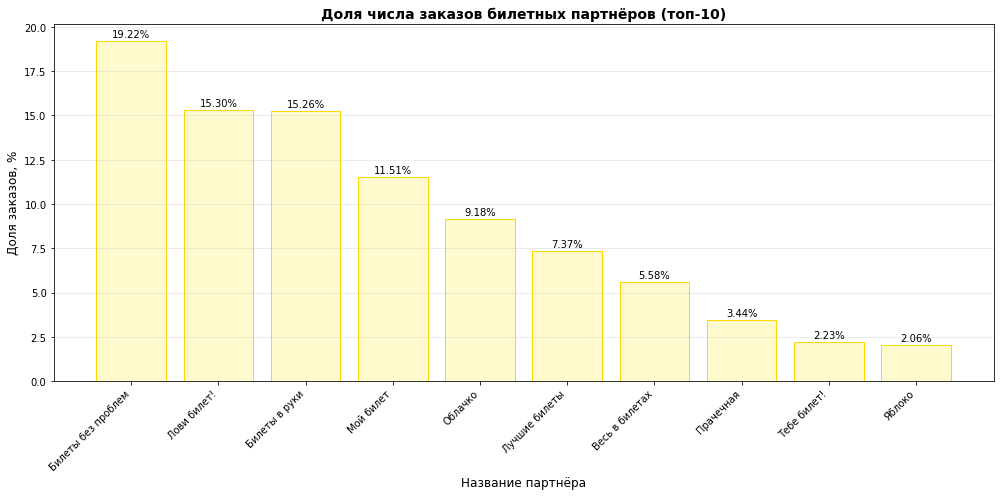

In [62]:
plt.figure(figsize=(14, 7))

top_10_partners_orders = partner_stats.head(10).sort_values('total_orders', ascending=False)

bars = plt.bar(top_10_partners_orders['service_name'], 
               top_10_partners_orders['orders_share'], 
               color='LemonChiffon', 
               edgecolor='gold')

plt.title('Доля числа заказов билетных партнёров (топ-10)', fontsize=14, fontweight='bold')
plt.xlabel('Название партнёра', fontsize=12)
plt.ylabel('Доля заказов, %', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

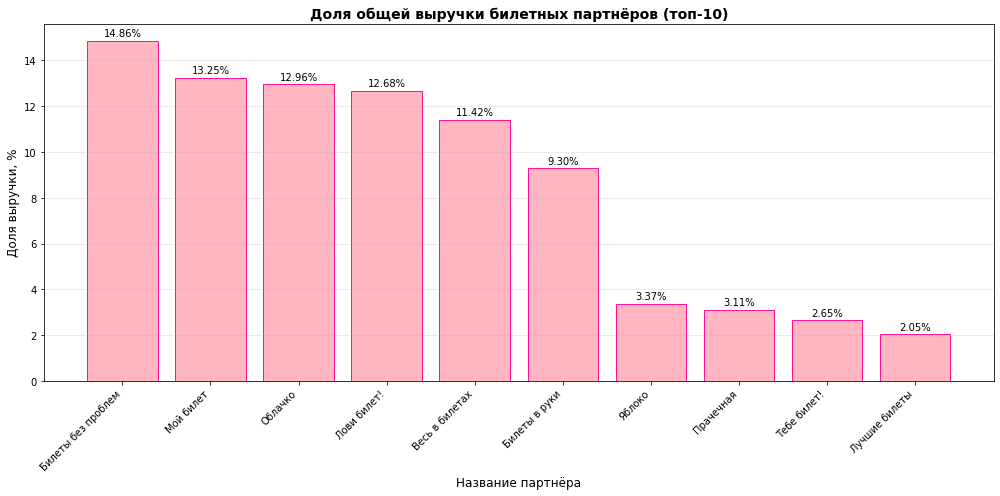

In [63]:
plt.figure(figsize=(14, 7))

top_10_partners_revenue = partner_stats.head(10).sort_values('revenue_share', ascending=False)

bars = plt.bar(top_10_partners_revenue['service_name'], 
               top_10_partners_revenue['revenue_share'], 
               color='LightPink', 
               edgecolor='deeppink')

plt.title('Доля общей выручки билетных партнёров (топ-10)', fontsize=14, fontweight='bold')
plt.xlabel('Название партнёра', fontsize=12)
plt.ylabel('Доля выручки, %', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Билетные операторы `Лови билет!`, `Билеты без проблем` и `Билеты в руки` являются лидерами в количестве уникальных мероприятий (20.90%, 16.46% и 14.27% соответственно), что составляет более половины от общего числа уникальных мероприятий среди всех билетных операторов.

Для общего числа мероприятий абсолютным лидером является `Билеты без проблем` (19.22% от общего числа). `Лови билет!` и `Билеты в руки` занимают второе и третье место в топе, их доли очень близки (15.30% и 15.26% соответственно).

Обратив внимание на доли общей выручки от билетных партнеров можно заметить, что лидером также является `Билеты без проблем` (14.87%). Однако второе место занимает `Мой билет`, третье - `Облачко`. Эти билетные партнеры также присутствуют в топ-10 по уникальным мероприятиям и общему числу мероприятий.

[Переход к содержанию](#Содержимое-проекта)

## Статистический анализ данных

Необходимо проверить две гипотезы, которые предполагают большую активность пользователей мобильных устройств:
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Используем данные только за осенний период.

In [64]:
autumn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168631 entries, 2 to 287749
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                168631 non-null  int64         
 1   user_id                 168631 non-null  object        
 2   created_dt_msk          168631 non-null  datetime64[ns]
 3   created_ts_msk          168631 non-null  datetime64[ns]
 4   event_id                168631 non-null  int64         
 5   cinema_circuit          168631 non-null  category      
 6   age_limit               168631 non-null  int8          
 7   currency_code           168631 non-null  category      
 8   device_type_canonical   168631 non-null  category      
 9   revenue                 168631 non-null  float64       
 10  service_name            168631 non-null  category      
 11  tickets_count           168631 non-null  int8          
 12  total                   168631

### Гипотеза 1

***Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств***

Сформируем нулевую и альтернативную гипотезы:

Нулевая гипотеза (H₀): Среднее количество заказов на одного пользователя мобильного приложения **не выше** по сравнению с пользователями стационарных устройств.

Альтернативная гипотеза (H₁): Среднее количество заказов на одного пользователя мобильного приложения **выше** по сравнению с пользователями стационарных устройств.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


 

Проверим пересечения пользователей в группах:

In [65]:
# Находим пересекающихся пользователей
mobile_users = autumn[autumn['device_type_canonical'] == 'mobile']['user_id'].unique()
desktop_users = autumn[autumn['device_type_canonical'] == 'desktop']['user_id'].unique()

intersection = set(mobile_users) & set(desktop_users)

print(f"Всего мобильных пользователей: {len(mobile_users)}")
print(f"Всего десктопных пользователей: {len(desktop_users)}")
print(f"Пользователей в обеих группах: {len(intersection)}")

Всего мобильных пользователей: 14192
Всего десктопных пользователей: 4868
Пользователей в обеих группах: 3249


Заметно пересечение в группах, одни и те же пользователи могли оформлять заказ как с мобильного устройства, так и с компьютера.

Исключим пересечения в группах:

In [66]:
# Фильтруем данные
autumn_clean = autumn[~autumn['user_id'].isin(intersection)].copy()

# подсчёт уникальных пользователей
mobile_clean_count = autumn_clean[autumn_clean['device_type_canonical'] == 'mobile']['user_id'].nunique()
desktop_clean_count = autumn_clean[autumn_clean['device_type_canonical'] == 'desktop']['user_id'].nunique()

print(f"Уникальных мобильных пользователей (после очистки): {mobile_clean_count}")
print(f"Уникальных десктопных пользователей (после очистки): {desktop_clean_count}")

Уникальных мобильных пользователей (после очистки): 10943
Уникальных десктопных пользователей (после очистки): 1619


После фильтрации выборки стали независимыми, пересечения отсутствуют. Можем заметить значительную разницу в размерах групп. Рассмотрим распределения в группах: 

In [67]:
mobile_orders_per_user = autumn_clean[autumn_clean['device_type_canonical'] == 'mobile'].groupby('user_id').size()
desktop_orders_per_user = autumn_clean[autumn_clean['device_type_canonical'] == 'desktop'].groupby('user_id').size()

print('Распределение в группе мобильных пользователей:')
print(mobile_orders_per_user.describe(percentiles=[.95, .99]))

print(f"\n{'*' * 30}\n")
print('Распределение в группе десктопных пользователей:')
print(desktop_orders_per_user.describe(percentiles=[.95, .99]))

Распределение в группе мобильных пользователей:
count    10943.000000
mean         2.858448
std          4.096663
min          1.000000
50%          2.000000
95%          9.000000
99%         20.000000
max        123.000000
dtype: float64

******************************

Распределение в группе десктопных пользователей:
count    1619.00000
mean        1.97097
std         3.05771
min         1.00000
50%         1.00000
95%         5.00000
99%        12.00000
max        56.00000
dtype: float64


В связи с ненормальностью распределения и наличием выбросов для проверки гипотезы выбран непараметрический тест Манна-Уитни. 

Уровень значимости установим на уровне 0.05.

In [68]:
alpha = 0.05

# U-тест Манна-Уитни (односторонний)
u_stat, p_value = stats.mannwhitneyu(
    mobile_orders_per_user,
    desktop_orders_per_user,
    alternative='greater'  # mobile > desktop
)

print(f"U-статистика: {u_stat}")
print(f"p-value (одностороннее): {p_value:.10f}")


if p_value > alpha:
    print(f'pvalue = {p_value:.4f} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
    print('Среднее количество заказов на одного пользователя мобильного приложения не выше по сравнению с пользователями стационарных устройств.')
else:   
    print(f'pvalue = {p_value:.4f} > {alpha}')
    print('Нулевая гипотеза не находит подтверждение!')
    print('Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.')

U-статистика: 10503706.0
p-value (одностороннее): 0.0000000000
pvalue = 0.0000 > 0.05
Нулевая гипотеза не находит подтверждение!
Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.


Результат теста говорит о том, что есть основания предполагать, что пользователи мобильных устройств действительно активнее пользователей стационарных устройств. Среднее количество заказов на одного пользователя действительно может быть выше.

### Гипотеза 2

***Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.***


Нулевая гипотеза (H₀): Среднее время между заказами пользователей мобильных приложений **не выше** по сравнению с пользователями стационарных устройств.

Альтернативная гипотеза (H₁): Среднее время между заказами пользователей мобильных приложений **выше** по сравнению с пользователями стационарных устройств.

Подготовим данные для теста:

In [69]:
mobile_all_days = autumn_clean[
    (autumn_clean['device_type_canonical'] == 'mobile') & (autumn_clean['days_since_prev'].notna())
]['days_since_prev']

desktop_all_days = autumn_clean[
    (autumn_clean['device_type_canonical'] == 'desktop') & (autumn_clean['days_since_prev'].notna())
]['days_since_prev']


print(f"Мобильные (с ≥2 заказами): {len(mobile_all_days)} пользователей")
print(f"Десктопы (с ≥2 заказами): {len(desktop_all_days)} пользователей")

Мобильные (с ≥2 заказами): 24593 пользователей
Десктопы (с ≥2 заказами): 2072 пользователей


Рассмотрим распределения в группах:

In [70]:
print('Распределение в группе мобильных пользователей:')
print(mobile_all_days.describe(percentiles=[.95, .99]))

print(f"\n{'*' * 30}\n")
print('Распределение в группе десктопных пользователей:')
print(desktop_all_days.describe(percentiles=[.95, .99]))

Распределение в группе мобильных пользователей:
count    24593.000000
mean        13.786443
std         25.708399
min          0.000000
50%          1.000000
95%         76.000000
99%        116.000000
max        148.000000
Name: days_since_prev, dtype: float64

******************************

Распределение в группе десктопных пользователей:
count    2072.000000
mean       18.114865
std        32.706342
min         0.000000
50%         0.000000
95%        95.900000
99%       128.000000
max       146.000000
Name: days_since_prev, dtype: float64


Распределение не нормальное, используем односторонний непараметрический тест Манна-Уитни. Перед этим сформируем нулевую и альтернативную гипотезы:

Уровень значимости установим на уровне 0.05.

In [71]:
alpha = 0.05

# U-тест Манна-Уитни (односторонний)
u_stat, p_value = stats.mannwhitneyu(
    mobile_all_days,
    desktop_all_days,
    alternative='greater'  # mobile > desktop
)

print(f"U-статистика: {u_stat}")
print(f"p-value (одностороннее): {p_value:.10f}")


if p_value > alpha:
    print(f'pvalue = {p_value:.4f} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
    print('Среднее время между заказами пользователей мобильных приложений не выше по сравнению с пользователями стационарных устройств.')
else:   
    print(f'pvalue = {p_value:.4f} > {alpha}')
    print('Нулевая гипотеза не находит подтверждение!')
    print('Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.')

U-статистика: 27145725.5
p-value (одностороннее): 0.0000000643
pvalue = 0.0000 > 0.05
Нулевая гипотеза не находит подтверждение!
Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.


По результатам теста есть основания предполагать, что нулевая гипотеза не находит подтверждение. Среднее время между заказами пользователей мобильных приложений действительно может быть выше по сравнению с пользователями стационарных устройств.

[Переход к содержанию](#Содержимое-проекта)

## Общий вывод и рекомендации

### Выводы

Был проведен исследовательский анализ данных сервиса бронирования билетов Яндекс Афиша за период с 1 июня по 31 октября 2024 года, определены причины изменения в пользовательском спросе.

**Выполненные задачи:**
- Загрузка данных, знакомство с их содержимым, предобработка данных;
- Проведен исследовательский анализ данных;
- Проведен статистический анализ данных;
- Построение визуализаций;
- Формулировка выводы по проведённому анализу.

- Была проведена очистка строк от пропусков, проверка на дубликаты и фильтрация от выбросов:
    - Изначально строк с данными: 290849
    - После предобработки данных: 287752 строк
    - Процент исключенных строк: ≈ 1%
    - Количество удаленных строк: 3097
- Проверены категориальные данные, оценили количество уникальных значений в каждом категориальном столбце;
- Проанализированы количественные данные, посмотрели на статистические данные и распределения в столбцах `revenue` и `tickets_count`;
- Выполнены преобразования типов данных в датафреймах;
- Объединены все датафреймы в единый, в котором созданы следующие столбцы:
	- `revenue_rub` — выручка с заказа в единой валюте — российский рубль. Для этого используем датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю `final_tickets_tenge_df.csv` за 2024 год;
	- `one_ticket_revenue_rub` — выручка с продажи одного билета на мероприятие;
	- `month — месяц оформления заказа`;
	- `season` — столбец с информацией о сезонности, включая такие категории, как: `лето`, `осень`, `зима`, `весна`.

**Выводы по исследовательскому анализу данных:**

- Зафиксировано увеличение заказов от июня к ноябрю 2024 года. В октябре заказов больше на 65120 шт., в процентом соотношении рост составляет 190,6%. Иначе говоря, к ноябрю 2024 года заказов стало в 2.9 раза больше.
- Лидирующие категории за оба сезона: `концерты`, `другое` и `театр`. Заметно изменение в долях заказов с изменением сезона. Доля заказов категорий `концерты`, `другое`, `стендап`, `выставки` к осени снизилась. Доля заказов категорий `театр`, `спорт`, `ёлки` к осени увеличилась. В категории `спорт` к осени доля заказов увеличилась примерно в **4.5 раза.**
- Сезонность **не влияет** на тип устройства, с которого делаются заказы.
- К осени возрастная группа `0` показывает рост на 5.65 п.п., в то время как категории `16` и `18` показывают спад на 2.12 и 4.52 п.п. соответственно. Можно предположить, что это связано с началом учебного года в школах, колледжах, вузах. К осени заметен небольшой рост у категории `12` (на 1.56 п.п.). Категория `6` имеет спад на 0.57 п.п. в доле заказов. 
- Отрицательное изменение средней цены билета наблюдается в пяти категориях (`концерты`, `ёлки`, `театр`, `другое`, `спорт`). Категории `стендап`, `выставки` показывают рост средней цены билета. Наибольшая средняя цена за билет наблюдается у категории `концерты` (304.79 руб летом и 268.35 руб осенью), наименьшая у `спорт` (50.76 руб летом и 49.96 руб осенью).
- Общий рост заказов к осени (×2.9)
    - Вероятная причина: Активное начало сезона, возвращение целевой аудитории из отпусков, предновогодний ажиотаж.
- Перераспределение долей категорий
    - Вероятная причина: Естественная смена форматов (с летних open-air на осенние indoor-мероприятия), начало спортивных сезонов.
- Сдвиг возрастной аудитории
    - Вероятная причина: Учебный график влияет на доступность досуга для студентов, родители активизируются в поиске детских мероприятий. Также есть взаимосвязь с началом учебного сезона.
- Изменение средней цены билета
    - Вероятная причина: Изменения могут быть связаны со сменой форматов мероприятий (переход от летних open-air к осенним indoor-площадкам), а также с корректировкой ценовой политики организаторов в преддверии высокоспросного сезона.
- Осенняя активность пользователей:
    - `Общее число заказов по дням`: наблюдается положительная динамика роста количества заказов, с ярковыраженными скачками количества заказов;
    - `Активные пользователи (DAU) по дням`: наблюдается положительная динамика роста показателя DAU;
    - `Среднее число заказов на пользователя`: наблюдается положительная динамика роста среднего числа заказов, с ярковыраженными скачками. Даты скачков на графике совпадают с графиком `Общее число заказов по дням`;
    - `Средняя стоимость билета по дням`: наблюдаются отрицательные скачки в средней стоимости билета, заметно, что отрицательные скачки совпадают с положительными скачками у числа заказов и среднего числа заказов на пользователя. К концу октября заметен спад показателя.
    - *Скачки в графиках можно связать с проведением с крупных мероприятий, выступлениями известных артистов и акционными предложениями на билеты.*
- Недельная активность пользователей:
    1. **Пиковые дни для заказов** — вторник, четверг и пятница. Можно предположить, что пользователи планируют досуг заранее, а не спонтанно. Возможно, в эти дни активизируются маркетинговые кампании или действуют специальные предложения, стимулирующие покупки. Выходные дни показывают снижение по сравнению с буднями.

    2. **Активность пользователей** равномерно высокая в течение всей недели (от 7 405 до 8 659 уникальных пользователей в день). Максимум наблюдается в четверг, минимум — в воскресенье. Стабильность DAU указывает на сформированную привычку пользоваться сервисом независимо от дня недели.

    3. **Выручка** достигает пика в четверг (4,83 млн руб.) и пятницу (4,61 млн руб.), с постепенным снижением к концу недели. **Воскресенье показывает минимальную общую выручку** (3,84 млн руб.). Это может быть связано с несколькими факторами:
       - Основные покупки совершаются **заранее** (в середине недели).
       - В воскресенье остаются в основном **спонтанные или низкобюджетные** покупки.
       - Возможно, в конце недели **менее дорогие** мероприятия или действуют скидки для заполнения залов.

    4. **Среднее количество заказов на пользователя** колеблется от 2,60 (воскресенье) до 3,72 (четверг) — в среднем около 3 билетов на пользователя. Более высокие показатели в будние дни, в сравнении с выходными, говорят о повышенной вовлечённости пользователей в дни активного планирования.

    **Итого** — в будни пользователи планируют и покупают, в выходные — потребляют купленные услуги.
- Популярные события и партнёры:
    - Абсолютные лидеры в разнообразии уникальных мероприятий: `Каменевский регион` (24.63% от общего числа уникальных мероприятий) и `Североярская область` (16.46% от общего числа уникальных мероприятий). Эти же регионы являются лидерами в доле общего числа заказов 27.68% и 12.29% соответственно.
    - Билетные операторы `Лови билет!`, `Билеты без проблем` и `Билеты в руки` являются лидерами в количестве уникальных мероприятий (20.90%, 16.46% и 14.27% соответственно), что составляет более половины от общего числа уникальных мероприятий среди всех билетных операторов.
    - Для общего числа мероприятий абсолютным лидером является `Билеты без проблем` (19.22% от общего числа). `Лови билет!` и `Билеты в руки` занимают второе и третье место в топе, их доли очень близки (15.30% и 15.26% соответственно).
    - Обратив внимание на доли общей выручки от билетных партнеров можно заметить, что лидером также является `Билеты без проблем` (14.87%). Однако второе место занимает `Мой билет`, третье - `Облачко`. Эти билетные партнеры также присутствуют в топ-10 по уникальным мероприятиям и общему числу мероприятий.

****Выводы по статистическому анализу данных:****

Были проверены две гипотезы:
1. Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
2. Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Вывод по гипотезе 1:
* Результат теста говорит о том, что есть основания предполагать, что пользователи мобильных устройств действительно активнее пользователей стационарных устройств. Среднее количество заказов на одного пользователя действительно может быть выше.

Вывод по гипотезе 2:
* По результатам теста есть основания предполагать, что нулевая гипотеза не находит подтверждение. Среднее время между заказами пользователей мобильных приложений действительно может быть выше по сравнению с пользователями стационарных устройств.

### Рекомендации

1. По сезонности и категориям:
    - Внедрить маркетинговые кампании для увеличения роста числа заказов в летний период;
    - Усилить продвижение театра и спорта осенью, т.к. наблюдается рост к интереса к осени;
    - Разработать осенние акции для возрастных категорий, показывающих спад.
2. По ценообразованию:
    - Исследовать причины падения цен на концерты (с 304.79 до 268.35 руб);
    - Протестировать повышение цен на стендап и выставки;
    - Исследовать причины падения средней цены на билеты к осени в категориях `театр`, `ёлки`, `театр`;
    - Ввести динамическое ценообразование на выходные.
3. По пользовательской активности:
    - Провести иследование причин большего среднего времени между заказами у пользователей мобильных устройств;
    - Ввести программу лояльности для удержания активных пользователей.
4. По регионам и партнерам:
    - Расширять сотрудничество с лидерами;
        - Регионы: `Каменевский`, `Североярская область`.
        - Партнеры: `Билеты без проблем`, `Лови билет!`.
        - Расширять сотрудничество с `Мой билет`, `Облачко` (показывают высокую выручку).
5. По акциям и событиям:
    - Планировать распродажи перед скачками активности;
    - Создавать пакетные предложения для мероприятий-лидеров;
    - Разработать программу для утренних/дневных мероприятий (снижение цены)

[В начало](#Исследовательский-анализ-данных-для-сервиса-Яндекс-Афиша)